# Customer Churn Prediction Analysis Using Supervised Learning Approach

- Using Normalized Data
- SeleckKBEST Feature Selection Technique 
- Using SMOTE Technique to handle class imbalance
- Models: Logistic Regression, Random Forest and SVM Model
- Using ROC AUC Curve to evaluate the model's performance

## Define the Problem: 
First we will define the objectives of this analysis and the questions you want to answer using the data and understand the context and purpose of the analysis.
- The analysis is to develop predictive model to forecast churn in telecommunication businesses.

## Importing Necessary Liabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

#### 

## Importing Dataset

In [2]:
data = pd.read_csv('customer_churn_dataset.csv')

In [3]:
european_countries = [
    'Albanie', 'Allemagne', 'Andorre', 'Autriche', 'Belgique', 'Biélorussie', 'Bosnie-Herzégovine', 'Bulgarie', 
    'Chypre', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Géorgie', 'Grèce', 
    'Hongrie', 'Islande', 'Irlande', 'Italie', 'Kazakhstan', 'Kosovo', 'Lettonie', 'Liechtenstein', 
    'Lituanie', 'Luxembourg', 'Malte', 'Moldavie', 'Monaco', 'Monténégro', 'Norvège', 'Pays-Bas', 
    'Pologne', 'Portugal', 'République tchèque', 'Roumanie', 'Royaume-Uni', 'Russie', 'Saint-Marin', 
    'Serbie', 'Slovaquie', 'Slovénie', 'Suède', 'Suisse', 'Ukraine', 'Vatican'
]

# Filter the dataset for European countries
data = data[data['country'].isin(european_countries)]

In [4]:
data.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,mrs,True,False,True,False,11,3196,106.53,8.88,de
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,miss,True,True,False,False,11,3198,106.60,8.88,se


In [5]:
data.tail

<bound method NDFrame.tail of        identifierHash  type      country language  socialNbFollowers  \
0          1920991140  user  Royaume-Uni       en                147   
1          1920925604  user       Monaco       en                167   
2          1920860068  user       France       fr                137   
5          1920597924  user    Allemagne       de                130   
6          1920532388  user        Suède       en                121   
...               ...   ...          ...      ...                ...   
98904      3957915554  user  Royaume-Uni       en                  3   
98906      3957784482  user      Irlande       en                  3   
98909      3957587874  user       France       fr                  3   
98910      3957522338  user     Belgique       en                  3   
98911      3957456802  user       Italie       it                  3   

       socialNbFollows  socialProductsLiked  productsListed  productsSold  \
0                   10      

## Data Transformation

In [6]:
data['churn'] = pd.cut(x=data['daysSinceLastLogin'], bins=[0, 180, 710], 
                     labels=['no', 'yes'])

In [7]:
data.dtypes

identifierHash            int64
type                     object
country                  object
language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityGenderId          int64
civilityTitle            object
hasAnyApp                  bool
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniority                 int64
seniorityAsMonths       float64
seniorityAsYears        float64
countryCode              object
churn                  category
dtype: object

### 

## Data Cleaning and Preprocessing

In this section we will;
- Handle missing values: Identify and deal with missing data by imputation or removal.
- Remove duplicates (if any): Eliminate duplicate records if present in the dataset (if any)
- Standardize data formats: Ensure consistency in data formats and units.
- Feature engineering: Create new features or transform existing ones to better represent the data and improve model performance.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68943 entries, 0 to 98911
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   identifierHash       68943 non-null  int64   
 1   type                 68943 non-null  object  
 2   country              68943 non-null  object  
 3   language             68943 non-null  object  
 4   socialNbFollowers    68943 non-null  int64   
 5   socialNbFollows      68943 non-null  int64   
 6   socialProductsLiked  68943 non-null  int64   
 7   productsListed       68943 non-null  int64   
 8   productsSold         68943 non-null  int64   
 9   productsPassRate     68943 non-null  float64 
 10  productsWished       68943 non-null  int64   
 11  productsBought       68943 non-null  int64   
 12  gender               68943 non-null  object  
 13  civilityGenderId     68943 non-null  int64   
 14  civilityTitle        68943 non-null  object  
 15  hasAnyApp          

In [9]:
data.size

1723575

In [10]:
data.nunique()

identifierHash         68943
type                       1
country                   42
language                   5
socialNbFollowers         85
socialNbFollows           77
socialProductsLiked      375
productsListed            62
productsSold              70
productsPassRate          70
productsWished           253
productsBought            61
gender                     2
civilityGenderId           3
civilityTitle              3
hasAnyApp                  2
hasAndroidApp              2
hasIosApp                  2
hasProfilePicture          2
daysSinceLastLogin       699
seniority                 19
seniorityAsMonths         19
seniorityAsYears           6
countryCode               42
churn                      2
dtype: int64

In [11]:
data.dtypes

identifierHash            int64
type                     object
country                  object
language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityGenderId          int64
civilityTitle            object
hasAnyApp                  bool
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniority                 int64
seniorityAsMonths       float64
seniorityAsYears        float64
countryCode              object
churn                  category
dtype: object

In [12]:
data.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,churn
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,no
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,True,False,True,True,12,3204,106.80,8.90,mc,no
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,no
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,True,False,True,False,11,3196,106.53,8.88,de,no
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,True,True,False,False,11,3198,106.60,8.88,se,no


### Handling Missing Data

In [13]:
data.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
churn                  0
dtype: int64

In [14]:
data.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
churn                  0
dtype: int64

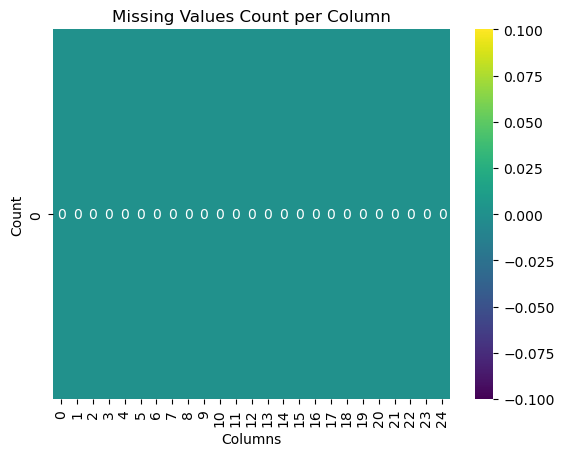

In [15]:
# Calculate the count of missing values in each column and convert it to a 2D array
missing_values_count = data.isna().sum().values.reshape(1, -1)

# Create a heatmap to visualize missing values count
sns.heatmap(missing_values_count, annot=True, cmap='viridis')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [16]:
data.isna().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
churn                  0
dtype: int64

### Checking for Duplicates

In [17]:
duplicate_rows = data[data.duplicated()]

if len(duplicate_rows) == 0:
    print("No duplicate rows found.")
else:
    print("Duplicate Rows:")
    print(duplicate_rows)

No duplicate rows found.


In [18]:
#Descriptive Analysis
data.describe(include = 'all')

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,churn
count,6.894300e+04,68943,68943,68943,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,...,68943,68943,68943,68943,68943.000000,68943.000000,68943.000000,68943.000000,68943,68943
unique,NaN,1,42,5,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,NaN,NaN,NaN,NaN,42,2
top,NaN,user,France,fr,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,NaN,NaN,NaN,NaN,fr,yes
freq,NaN,68943,25135,25128,NaN,NaN,NaN,NaN,NaN,NaN,...,48028,64792,52045,67365,NaN,NaN,NaN,NaN,25135,61290
mean,1.890878e+09,NaN,NaN,NaN,3.492407,8.563872,4.936875,0.116836,0.158029,1.062562,...,NaN,NaN,NaN,NaN,568.467807,3062.691644,102.089538,8.507452,NaN,NaN
std,1.276369e+09,NaN,NaN,NaN,4.417228,63.258142,213.812078,2.288426,2.349238,9.687329,...,NaN,NaN,NaN,NaN,218.331819,168.538433,5.617711,0.468519,NaN,NaN
min,1.309790e+05,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,11.000000,2852.000000,95.070000,7.920000,NaN,NaN
25%,8.119582e+08,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,514.000000,2857.000000,95.230000,7.940000,NaN,NaN
50%,1.641808e+09,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,693.000000,3196.000000,106.530000,8.880000,NaN,NaN
75%,2.945286e+09,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,701.000000,3201.000000,106.700000,8.890000,NaN,NaN


In [19]:
# Assuming 'data' is your DataFrame and 'lastLoginDate' is a datetime column
#data['daysSinceLastLogin'] = pd.to_datetime(data['daysSinceLastLogin'])

# Define a threshold for "recent login"
#threshold_days = 365
#recent_date_threshold = pd.Timestamp('now') - pd.Timedelta(days=threshold_days)

# Create a binary column: 'recentLogin'
#data['recentLogin'] = data['daysSinceLastLogin'] >= recent_date_threshold
#data['recentLogin'] = data['recentLogin'].map({True: 'Yes', False: 'No'})
#data.head()


### 

## Exploratory Data Analysis (EDA):

- Here we will summarize and visualize the data using statistical measures, charts, and graphs.

In [20]:
data.dtypes

identifierHash            int64
type                     object
country                  object
language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityGenderId          int64
civilityTitle            object
hasAnyApp                  bool
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniority                 int64
seniorityAsMonths       float64
seniorityAsYears        float64
countryCode              object
churn                  category
dtype: object

### Visualizing the Distribution of Services

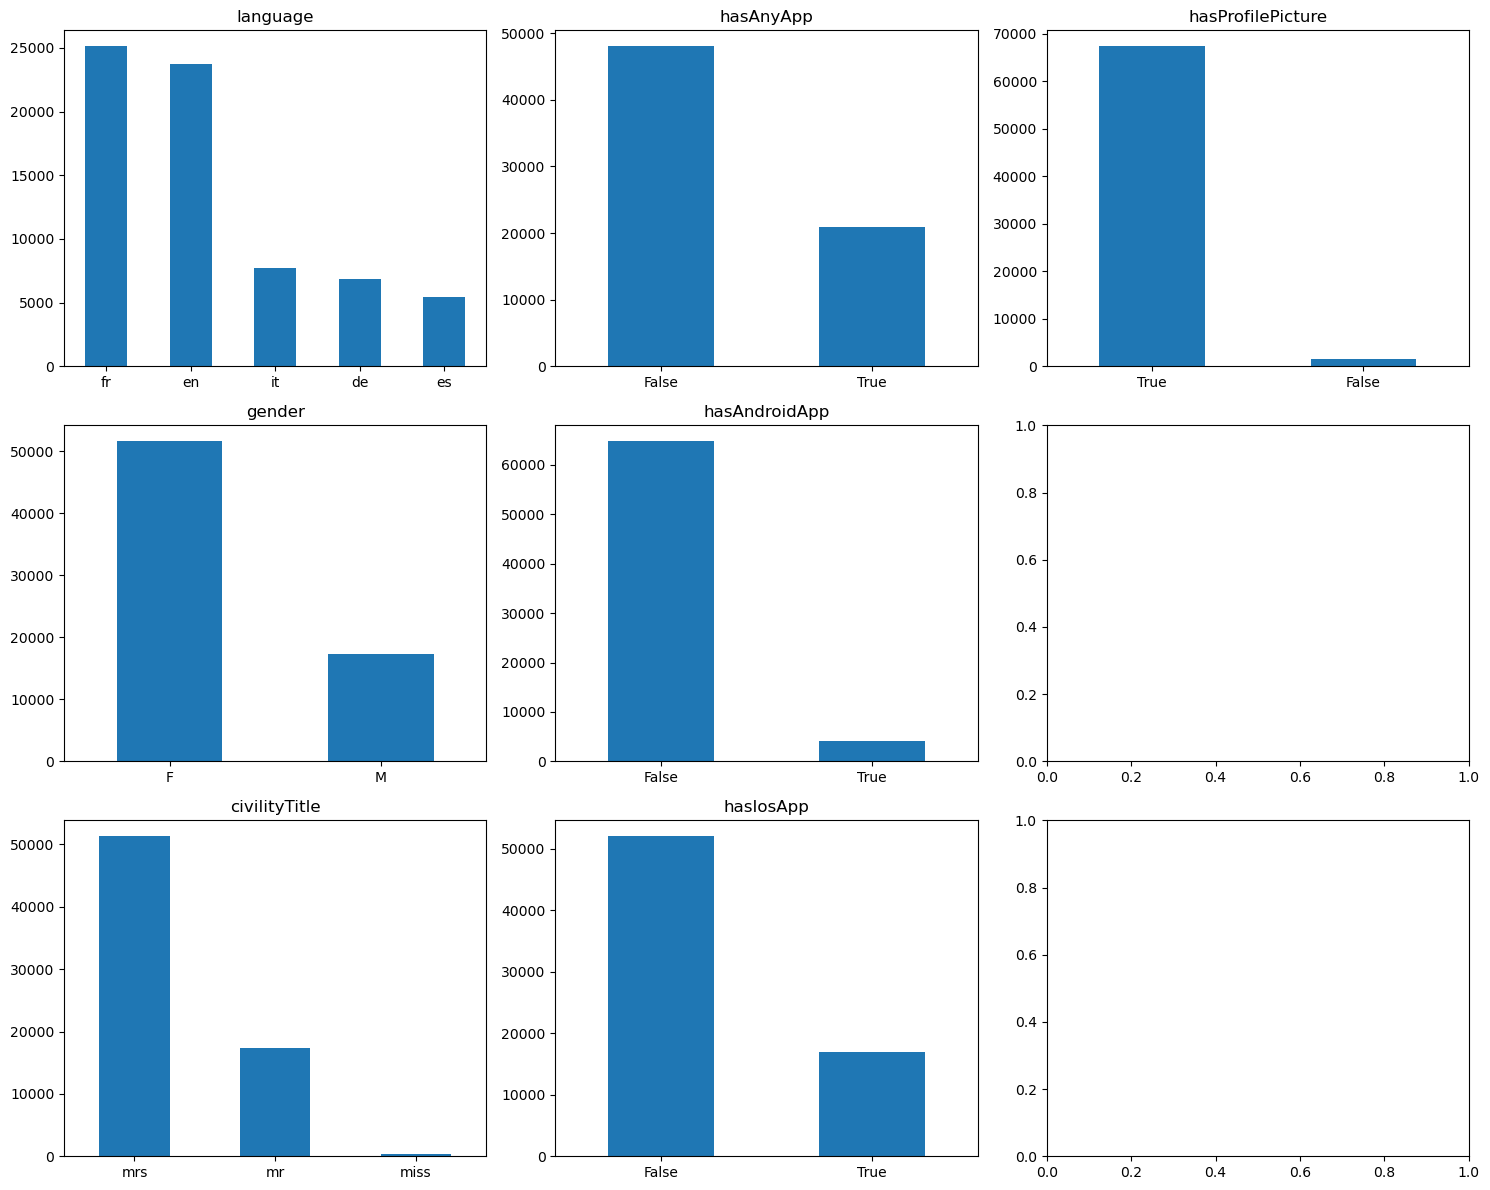

In [21]:
# List of categorical columns to plot
categorical_columns = ['language', 'gender', 'civilityTitle', 
                       'hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, item in enumerate(categorical_columns):
    if i < 3:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0)
    elif i >= 3 and i < 6:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i-3, 1], rot=0)
    elif i < 9:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i-6, 2], rot=0)
    ax.set_title(item)

# Adjust layout to make sure titles and labels fit well
plt.tight_layout()
plt.show()

#### Using Groupby

In [22]:
data.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,churn
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,no
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,True,False,True,True,12,3204,106.80,8.90,mc,no
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,no
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,True,False,True,False,11,3196,106.53,8.88,de,no
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,True,True,False,False,11,3198,106.60,8.88,se,no


#### Overall Percentage and Count of Customers that Churned

In [23]:
#data['Churn'].value_counts()/100
percentage_counts = data['churn'].value_counts(normalize=True) * 100
print(percentage_counts)

yes    88.899526
no     11.100474
Name: churn, dtype: float64


In [24]:
 data['churn'].value_counts()

yes    61290
no      7653
Name: churn, dtype: int64

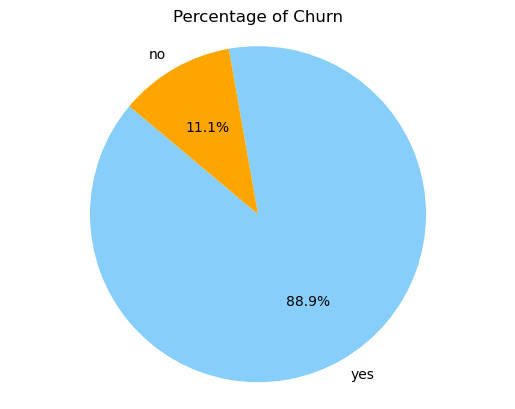

In [25]:
# Visualizing and Calculate percentage counts
percentage_counts = data['churn'].value_counts(normalize=True) * 100

# Plotting
labels = percentage_counts.index
sizes = percentage_counts.values
colors = ['lightskyblue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Churn')
plt.axis('equal')
plt.show()

#### We can see there is a significant class imbalance between customers that churned and customers that didn't churn. In the coming steps we will be using the SMOTE technique an oversampling method to address the class imbalance as this imbalance can affect the model's performance.

### 

### Churn by Gender

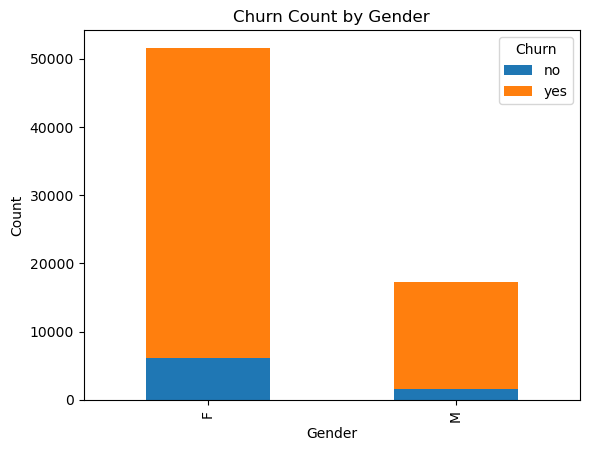

In [26]:
# Calculate the count of churned and non-churned customers by gender
churn_count = data.groupby(['gender', 'churn']).size().unstack()

custom_palette = {"Male": "lightskyblue", "Female": "orange"}

# Plotting
churn_count.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Count by Gender')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [27]:
# Calculate the count of churned and non-churned customers by gender
churn_count = data.groupby(['gender', 'churn']).size().unstack()

print(churn_count)

churn     no    yes
gender             
F       6121  45493
M       1532  15797


### figures are different for male and female. There are more female customer as agianst the male.

#### 

### Churn by seniorityAsYears

#### Customer that have been with the company for years that churned

In [28]:
churn_counts = data[data['churn'] == 'yes'].groupby('seniorityAsYears').size()
print(churn_counts)

seniorityAsYears
7.92     4381
7.93    10179
7.94     9818
8.88    13644
8.89    13640
8.90     9628
dtype: int64


Most customers who churned had a seniority of around 8.88 and 8.89 years, representing the highest proportions of the churned population.
The seniority years of 7.93 and 7.94 also have significant churn counts, highlighting potential periods of increased risk for churn
This breakdown helps to identify patterns in customer tenure that correlate with higher churn rates, which can be valuable for targeted retention strategies..

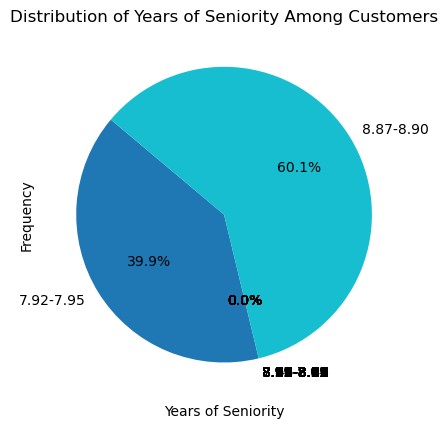

In [29]:
# Calculate the histogram
hist, bins = np.histogram(data['seniorityAsYears'], bins=30)

# Plotting the pie chart
plt.pie(hist, labels=[f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)], autopct='%1.1f%%', startangle=140)

# Adding labels and title
plt.xlabel('Years of Seniority')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Seniority Among Customers')

# Display the plot
plt.show()

In [30]:
data.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,churn
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,no
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,True,False,True,True,12,3204,106.80,8.90,mc,no
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,no
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,True,False,True,False,11,3196,106.53,8.88,de,no
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,True,True,False,False,11,3198,106.60,8.88,se,no


#### Customer that are seniorityAsYears who did not Churn

In [31]:
churn_counts = data[data['churn'] == 'no'].groupby('seniorityAsYears').size()
print(churn_counts)

seniorityAsYears
7.92     607
7.93    1280
7.94    1225
8.88    1613
8.89    1712
8.90    1216
dtype: int64


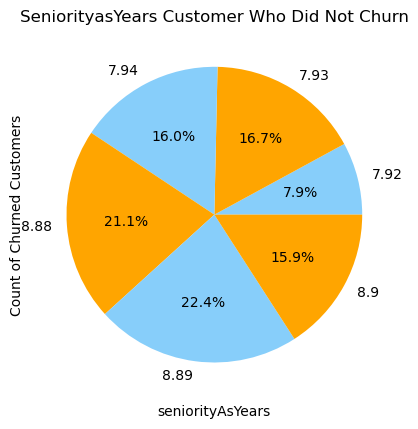

In [32]:
# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting the pie chart
plt.pie(churn_counts.values, labels=churn_counts.index, colors=colors, autopct='%1.1f%%')

# Adding labels and title
plt.xlabel('seniorityAsYears')
plt.ylabel('Count of Churned Customers')
plt.title('SeniorityasYears Customer Who Did Not Churn')

# Display the plot
plt.show()

### 

### Churn by civilityTitle

#### Customers who Churned by civilityTitle

In [33]:
churn_count = data[data['churn'] == 'yes'].groupby(['civilityTitle']).size()
print(churn_count)

civilityTitle
miss      197
mr      15797
mrs     45296
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

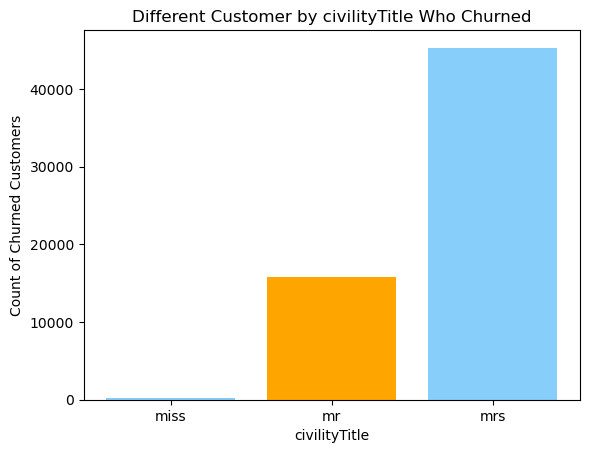

In [34]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_count.index, churn_count.values, color=colors)
plt.xlabel('civilityTitle')
plt.ylabel('Count of Churned Customers')
plt.title('Different Customer by civilityTitle Who Churned')
plt.xticks

#### Customers by civilityTitle who did not Churned

In [35]:
churn_count = data[data['churn'] == 'no'].groupby(['civilityTitle']).size()
print(churn_count)

civilityTitle
miss     126
mr      1532
mrs     5995
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

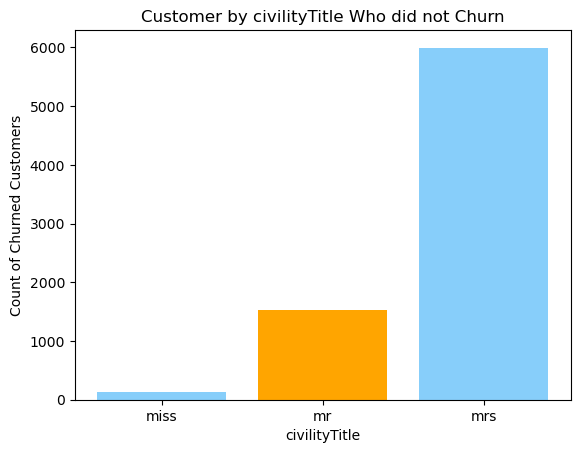

In [36]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_count.index, churn_count.values, color=colors)
plt.xlabel('civilityTitle')
plt.ylabel('Count of Churned Customers')
plt.title('Customer by civilityTitle Who did not Churn')
plt.xticks

#### 

### Churn by cutomers that has profile picture

#### Customers who hasProfilePicture who Churned

In [37]:
churn_counts = data[data['churn'] == 'yes'].groupby(['hasProfilePicture']).size()
print(churn_counts)

hasProfilePicture
False      716
True     60574
dtype: int64


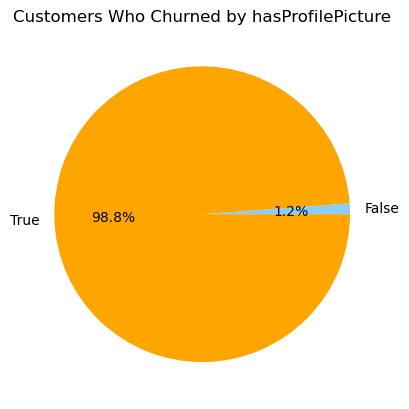

In [38]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting the pie chart
plt.pie(churn_counts.values, labels=churn_counts.index, colors=colors, autopct='%1.1f%%')

# Adding a title
plt.title('Customers Who Churned by hasProfilePicture')

# Display the plot
plt.show()

#### 

### Churn by Contract Type

#### Customers who bought product who Churned

In [39]:
# Define the bins and labels for productsBought
bins = [1, 11, 21, 31, 51, 406]
labels = ['1-10', '11-20', '21-30', '30-50', '50-405']

In [40]:
# Create a new column for the binned productsBought
data['productsBoughtRange'] = pd.cut(data['productsBought'], bins=bins, labels=labels, right=False, include_lowest=True)

In [41]:
# Filter data for customers who churned and group by the productsBought ranges
churn_counts = data[data['churn'] == 'yes'].groupby('productsBoughtRange', observed=True).size()

In [42]:
#Customers who Churned
churn_counts = data[data['churn'] == 'yes'].groupby(['productsBoughtRange'], observed=True).size()
print(churn_counts)

productsBoughtRange
1-10      2045
11-20       11
21-30        1
30-50        2
50-405       2
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

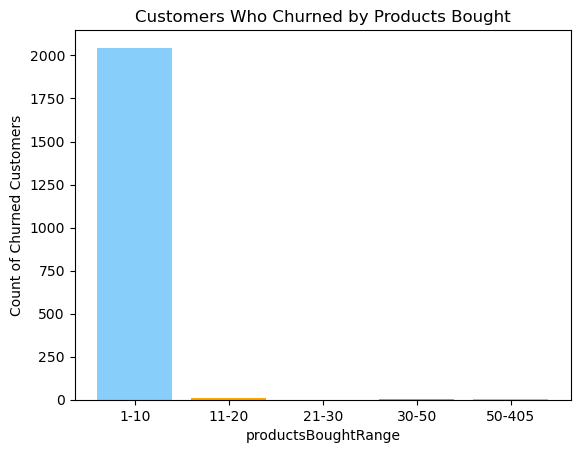

In [43]:
# Define custom colors (you may need more colors if you have more bins)
colors = ['lightskyblue', 'orange', 'lightgreen', 'lightcoral']

# Plotting
plt.bar(churn_counts.index, churn_counts.values, color=colors)
plt.xlabel('productsBoughtRange')
plt.ylabel('Count of Churned Customers')
plt.title('Customers Who Churned by Products Bought')
plt.xticks


#### Customer who did not Churn by product bought

In [44]:
#Customers who did not Churn
churn_counts = data[data['churn'] == 'no'].groupby(['productsBoughtRange'], observed=True).size()
print(churn_counts)

productsBoughtRange
1-10      1943
11-20      110
21-30       42
30-50       27
50-405      17
dtype: int64


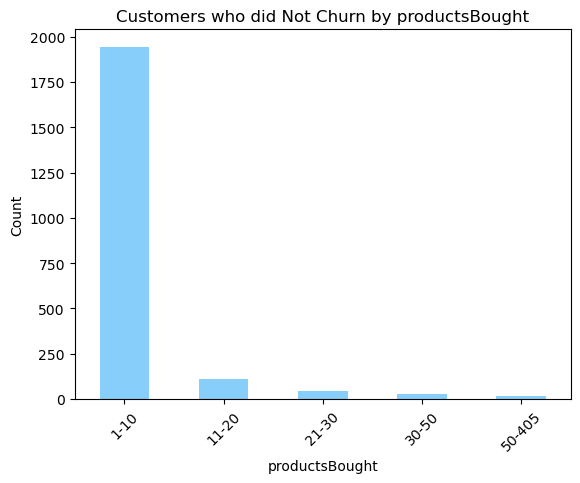

In [45]:
churn_counts = data[data['churn'] == 'no'].groupby(['productsBoughtRange'], observed=True).size()

# Plotting
churn_counts.plot(kind='bar', color='lightskyblue')
plt.xlabel('productsBought')
plt.ylabel('Count')
plt.title('Customers who did Not Churn by productsBought')
plt.xticks(rotation=45)
plt.show()

### Summary of the product bought

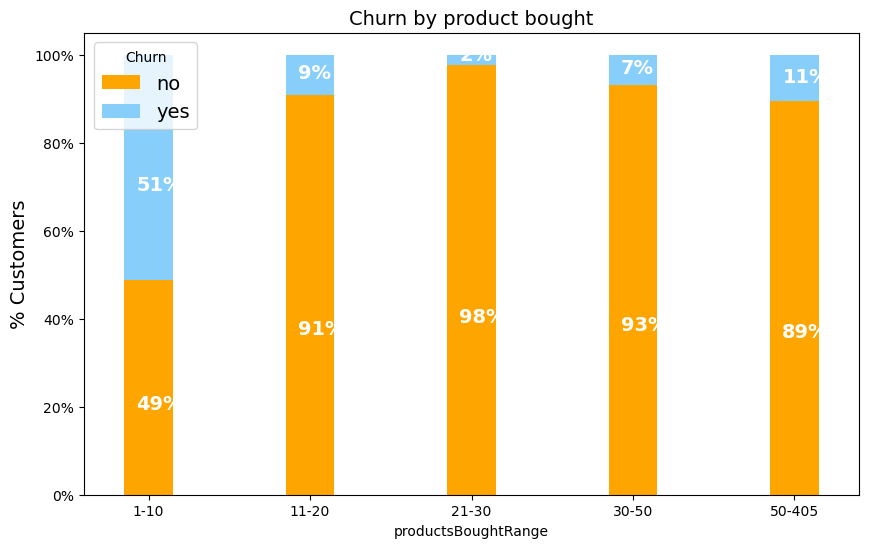

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ['orange', 'lightskyblue']
contract_churn = data.groupby(['productsBoughtRange','churn'], observed=True).size().unstack()

ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                               width=0.3,
                                                               stacked=True,
                                                               rot=0,
                                                               figsize=(10,6),
                                                               color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by product bought', size=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

plt.show()

- It can be noted that the number of customer that churned are not committed customer. 
- They are majorly people that make one-off purchase

### Distribution of socialProductsLiked  by Churn

#### 

#### 

### Data Pre-processing

Here we;
- Further explored the relationships between variables and identified patterns or trends.
- Performed feature engineering by creating new features/columns and transforming existing ones to better represent the data and improve model performance.
- Utilised encoding techniques like Label Encoder and One Hot Encoder.
- Performed Normalization using Min Max Scaler
- Performed Feature Selection for dimensionality reduction using “Recursive Feature Elimination (RFE)” to reduce complexity and improve model performance.

### Label Encoding

#### Here we will perform Label Encoding to transform categorical columns with 2 observations to 0 and 1 
#### And use One Hot Encoder for columns with more than 2 observations
#### we will drop redundant columns too

In [47]:
data.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,6.894300e+04,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000
mean,1.890878e+09,3.492407,8.563872,4.936875,0.116836,0.158029,1.062562,1.812207,0.196873,1.753332,568.467807,3062.691644,102.089538,8.507452
std,1.276369e+09,4.417228,63.258142,213.812078,2.288426,2.349238,9.687329,28.139100,2.573632,0.441809,218.331819,168.538433,5.617711,0.468519
min,1.309790e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,8.119582e+08,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,514.000000,2857.000000,95.230000,7.940000
50%,1.641808e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,693.000000,3196.000000,106.530000,8.880000
75%,2.945286e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,701.000000,3201.000000,106.700000,8.890000
max,4.294967e+09,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


#### Dropping redundant columns

In [48]:
# List of columns to drop
columns_to_drop = ['country', 'identifierHash', 'seniority', 'countryCode', 'civilityGenderId', 'hasAnyApp', 'type', 'productsBoughtRange']

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [49]:
data.dtypes

language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityTitle            object
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniorityAsMonths       float64
seniorityAsYears        float64
churn                  category
dtype: object

In [50]:
print(data.head())

  language  socialNbFollowers  socialNbFollows  socialProductsLiked  \
0       en                147               10                   77   
1       en                167                8                    2   
2       fr                137               13                   60   
5       de                130               12                    1   
6       en                121                0                 1140   

   productsListed  productsSold  productsPassRate  productsWished  \
0              26           174              74.0             104   
1              19           170              99.0               0   
2              33           163              94.0              10   
5              47           123              91.0               0   
6              31           108              94.0             531   

   productsBought gender civilityTitle  hasAndroidApp  hasIosApp  \
0               1      M            mr          False       True   
1               0     

In [51]:
data.dtypes

language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityTitle            object
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniorityAsMonths       float64
seniorityAsYears        float64
churn                  category
dtype: object

In [52]:
data.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityTitle,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsMonths,seniorityAsYears,churn
0,en,147,10,77,26,174,74.0,104,1,M,mr,False,True,True,11,106.53,8.88,no
1,en,167,8,2,19,170,99.0,0,0,F,mrs,False,True,True,12,106.80,8.90,no
2,fr,137,13,60,33,163,94.0,10,3,F,mrs,False,True,False,11,106.77,8.90,no
5,de,130,12,1,47,123,91.0,0,0,F,mrs,False,True,False,11,106.53,8.88,no
6,en,121,0,1140,31,108,94.0,531,105,F,miss,True,False,False,11,106.60,8.88,no


#### 

In [53]:
data.shape

(68943, 18)

## Feature Engineering

- Feature Extraction
- Feature Transformation

### Using One Hot Encoder
Now let's convert Internet Service, Contract, and Payment Method to numeric using One Hot Encoder

In [59]:
data1 = data.drop(['civilityTitle'], axis=1)

# Assuming 'data' is your DataFrame
#Convert 'Churn' column to numeric: 1 for 'Yes', 0 for 'No'
data1['churn'] = data1['churn'].map({'yes': 1, 'no': 0}).astype(int)

data2 = pd.get_dummies(data1)

data2['daysSinceLastLogin'] = pd.to_datetime(data2['daysSinceLastLogin']).astype(np.int64)

data2.astype(int)

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,hasAndroidApp,hasIosApp,...,seniorityAsMonths,seniorityAsYears,churn,language_de,language_en,language_es,language_fr,language_it,gender_F,gender_M
0,147,10,77,26,174,74,104,1,0,1,...,106,8,0,0,1,0,0,0,0,1
1,167,8,2,19,170,99,0,0,0,1,...,106,8,0,0,1,0,0,0,1,0
2,137,13,60,33,163,94,10,3,0,1,...,106,8,0,0,0,0,1,0,1,0
5,130,12,1,47,123,91,0,0,0,1,...,106,8,0,1,0,0,0,0,1,0
6,121,0,1140,31,108,94,531,105,1,0,...,106,8,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98904,3,8,0,0,0,0,0,0,0,0,...,106,8,1,0,1,0,0,0,1,0
98906,3,8,0,0,0,0,0,0,0,0,...,106,8,1,0,1,0,0,0,1,0
98909,3,8,0,0,0,0,0,0,0,1,...,106,8,1,0,0,0,1,0,0,1
98910,3,8,0,0,0,0,0,0,1,0,...,106,8,1,0,1,0,0,0,0,1


In [60]:
#Let's view the data to ensure the columns have been coverted accordingly
data2.dtypes

socialNbFollowers        int64
socialNbFollows          int64
socialProductsLiked      int64
productsListed           int64
productsSold             int64
productsPassRate       float64
productsWished           int64
productsBought           int64
hasAndroidApp             bool
hasIosApp                 bool
hasProfilePicture         bool
daysSinceLastLogin       int64
seniorityAsMonths      float64
seniorityAsYears       float64
churn                    int32
language_de              uint8
language_en              uint8
language_es              uint8
language_fr              uint8
language_it              uint8
gender_F                 uint8
gender_M                 uint8
dtype: object

In [61]:
data2.head(20)

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,hasAndroidApp,hasIosApp,...,seniorityAsMonths,seniorityAsYears,churn,language_de,language_en,language_es,language_fr,language_it,gender_F,gender_M
0,147,10,77,26,174,74.0,104,1,False,True,...,106.53,8.88,0,0,1,0,0,0,0,1
1,167,8,2,19,170,99.0,0,0,False,True,...,106.80,8.90,0,0,1,0,0,0,1,0
2,137,13,60,33,163,94.0,10,3,False,True,...,106.77,8.90,0,0,0,0,1,0,1,0
5,130,12,1,47,123,91.0,0,0,False,True,...,106.53,8.88,0,1,0,0,0,0,1,0
6,121,0,1140,31,108,94.0,531,105,True,False,...,106.60,8.88,0,0,1,0,0,0,1,0
7,53,9,3,5,106,98.0,0,0,False,True,...,95.23,7.94,0,0,0,0,1,0,1,0
8,744,13764,51671,0,104,85.0,1842,0,False,True,...,106.50,8.88,0,0,0,0,0,1,1,0
9,57,8,45,123,92,74.0,6,2,False,True,...,95.20,7.93,0,0,1,0,0,0,1,0
10,127,40,863,40,87,89.0,68,0,False,True,...,106.50,8.88,0,0,0,0,0,1,0,1
12,46,19,1308,63,87,92.0,564,36,False,True,...,106.50,8.88,0,0,0,1,0,0,1,0


In [62]:
data3 = data2.drop(['daysSinceLastLogin'], axis = 1)

### Correlation Analysis

In [63]:
# Assuming 'data' is your DataFrame
#Convert 'Churn' column to numeric: 1 for 'Yes', 0 for 'No'
#data2['churn'] = data2['churn'].map({'yes': 1, 'no': 0})

# Calculate correlations between all columns and the target variable "Churn"
correlation_with_churn = data3.corr()['churn'].sort_values(ascending=False)

# Print correlation values
print(correlation_with_churn)

churn                  1.000000
hasProfilePicture      0.212061
gender_M               0.041682
language_fr            0.031883
language_es            0.030736
seniorityAsYears       0.005684
seniorityAsMonths      0.005634
language_de           -0.007734
language_it           -0.009010
hasAndroidApp         -0.018483
socialNbFollows       -0.023207
language_en           -0.038910
gender_F              -0.041682
socialProductsLiked   -0.053789
productsListed        -0.129634
productsWished        -0.143141
hasIosApp             -0.151916
productsBought        -0.156451
socialNbFollowers     -0.157523
productsSold          -0.162635
productsPassRate      -0.247866
Name: churn, dtype: float64


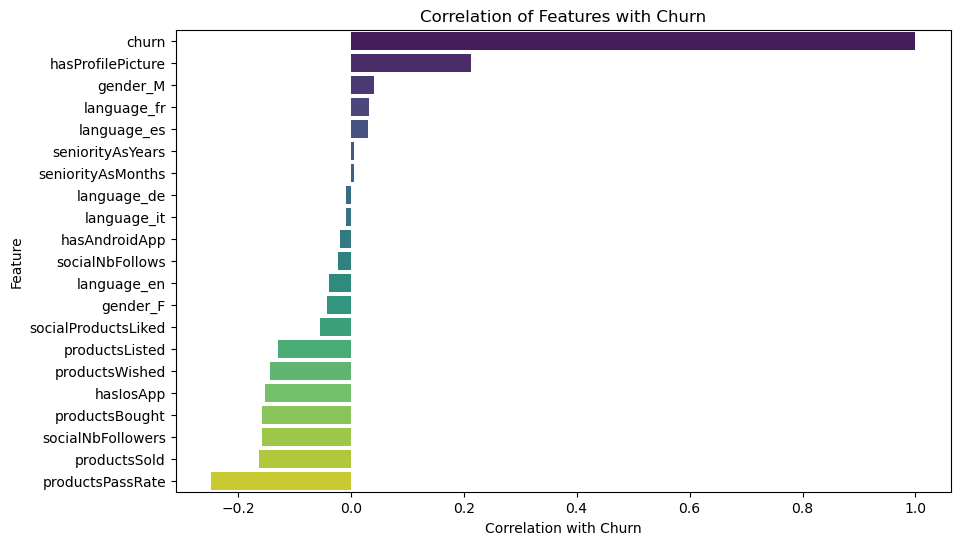

In [64]:
# Calculate correlations between all columns and the target variable "Churn"
correlation_with_churn = data3.corr()['churn'].sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, palette='viridis')
plt.xlabel('Correlation with Churn')
plt.ylabel('Feature')
plt.title('Correlation of Features with Churn')
plt.show()

#### From the above we can see that there is no perfect correlation with the target variable

####  

### Feature Selection Using SelectKBest 

Since we have 26 columns with no perfect correlation to the target variable we will be using a feature selection techniques to identify the most relevant variables for building the model. This would helps to improve the model performance, reduce overfitting, and enhance interpretability. 
For this we will be using 'SelectKBest' Mutual Information based feature selection to help identify important features. It selects the top k features with the highest mutual information scores, indicating the strength of association between each feature and the target.

#### 

## Model Building and Evaluation.

- Choose appropriate statistical or machine learning models based on the problem and data characteristics.
- Split the data into training and testing sets for model evaluation.
- Train the models on the training data and evaluate their performance using appropriate metrics.
- Fine-tune model parameters and compare different models to select the best-performing one.
- Iterate and Refine Review the analysis process and results, and iterate as needed to refine the analysis or address new questions or insights.

### Splitting the Data into Training and Testing

In [65]:
X = data3.drop('churn', axis = 1)

y = data3['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 

### Normalizing the Data Using MinMaxScaler

We will apply normalization technique on the dataset because the dataset columns are of  different scale. Here we will using the Min Max Scaler to normalize the dataset.

In [66]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [145]:
# Fit the scaler to your training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

# Now X_train_normalized and X_test_normalized contain the normalized data

#### 

### Selecting the Model
Here we will be using 4 models 
- Logistic Regression Model
- Random Forest Classifier
- Support Vector Machine Classifier

After which we will select the best fit model

### Models

In [68]:
#Initializing Models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm_model = SVC(probability=True)

### 

## EXPERIMENT 1

### Using All the Features without SelectKBest

First let's build our model using all the features after which we will use the SelectKBest on top 10 and 20

### Logistic Regression

In [69]:
# Train and evaluate Logistic Regression model on normalized data
logistic_regression.fit(X_train_normalized, y_train)
y_pred_lr_normalized = logistic_regression.predict(X_test_normalized)
accuracy_lr_normalized = accuracy_score(y_test, y_pred_lr_normalized)
conf_matrix_lr_normalized = confusion_matrix(y_test, y_pred_lr_normalized)

# Make predictions on the train set
y_pred_train_lr_normalized = logistic_regression.predict(X_train_normalized)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr_normalized = accuracy_score(y_train, y_pred_train_lr_normalized)
print("Logistic Regression Accuracy on the train set (Normalized Data):", train_accuracy_lr_normalized)

# Print the accuracy of the test set for Logistic Regression model
print("Logistic Regression Accuracy (Normalized Data - Test Set):", accuracy_lr_normalized)
print("Logistic Regression Classification Report (Normalized Data):")
print(classification_report(y_test, y_pred_lr_normalized))
print("Logistic Regression Confusion Matrix (Normalized Data):")
print(conf_matrix_lr_normalized)

Logistic Regression Accuracy on the train set (Normalized Data): 0.897505167349603
Logistic Regression Accuracy (Normalized Data - Test Set): 0.8986148379142795
Logistic Regression Classification Report (Normalized Data):
              precision    recall  f1-score   support

           0       0.77      0.12      0.21      1528
           1       0.90      1.00      0.95     12261

    accuracy                           0.90     13789
   macro avg       0.84      0.56      0.58     13789
weighted avg       0.89      0.90      0.86     13789

Logistic Regression Confusion Matrix (Normalized Data):
[[  184  1344]
 [   54 12207]]


- Importing evaluation metric from sklearn

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [71]:
lr_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train, y_pred_train_lr_normalized), recall_score(y_train,  y_pred_train_lr_normalized),  precision_score(y_train,  y_pred_train_lr_normalized),
                accuracy_score(y_train,  y_pred_train_lr_normalized)]}

df_lr = pd.DataFrame(lr_evaluation)
 
# Print the output.
print(df_lr)

            metric  lr_value
0         F1 score  0.945235
1     Recall score  0.995023
2  Precision score  0.900192
3   Accuracy score  0.897505


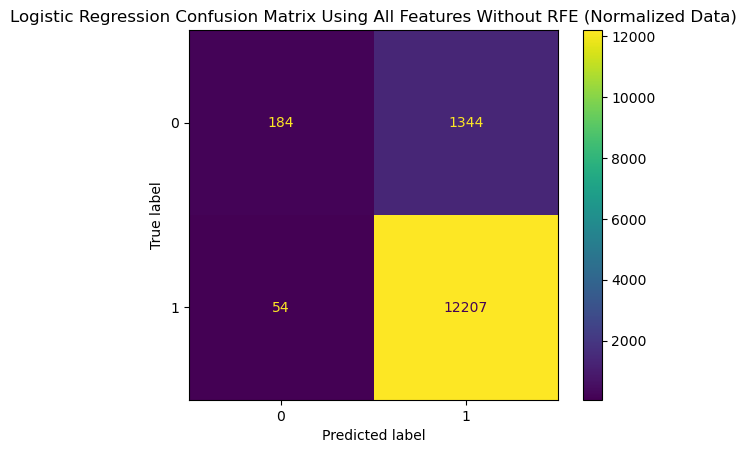

In [72]:
# Plotting the Confusion Matrix for Logistic Regression Model with Normalized Data
cm_display_lr_normalized = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr_normalized)
cm_display_lr_normalized.plot()
plt.title("Logistic Regression Confusion Matrix Using All Features Without RFE (Normalized Data)")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the  true positive is predicting rightly that a customer will churn. The Logistic Regression Model is able to predict 12209 actual churn and 52 wrong prediction of that a customer will churn and did not churn.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of  0.202117 which is very bad model and shows how inaccurate our model predicts a customer will not churn

- The model does much more better if it F1 score is more than 0.7

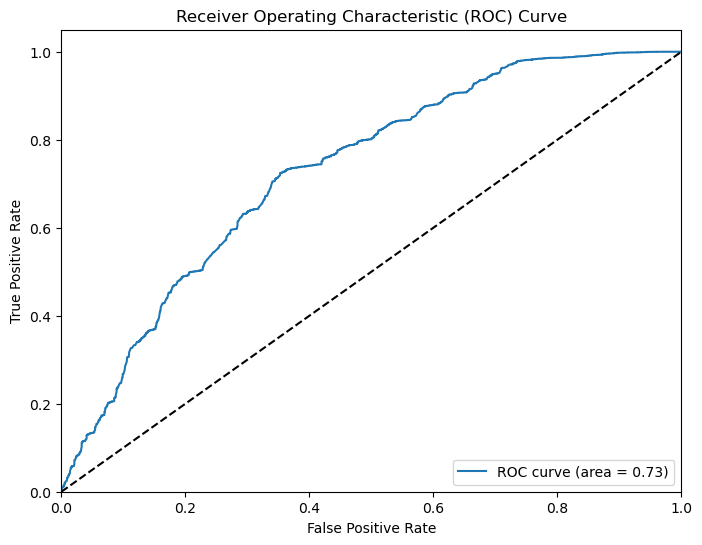

In [73]:
# Plotting the ROC curve for Logistic Regression Model with Normalized Data
y_prob_lr_normalized = logistic_regression.predict_proba(X_test_normalized)[:, 1]
fpr_lr_normalized, tpr_lr_normalized, thresholds_lr_normalized = roc_curve(y_test, y_prob_lr_normalized)
auc_lr_normalized = roc_auc_score(y_test, y_prob_lr_normalized)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_normalized, tpr_lr_normalized, label='ROC curve (area = %0.2f)' % auc_lr_normalized)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 

### SVM Model

In [74]:
%%time

# Train the SVM model on normalized data without RFE
svm_model.fit(X_train_normalized, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_normalized)

# Make predictions on the train set
y_pred_train_svm = svm_model.predict(X_train_normalized)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
print("SVM Accuracy on the train set (Normalized Data without RFE):", train_accuracy_svm)

# Evaluate the model
print("Scenario: Normalized data without RFE")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

SVM Accuracy on the train set (Normalized Data without RFE): 0.898230409399137
Scenario: Normalized data without RFE
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.10      0.18      1528
           1       0.90      1.00      0.95     12261

    accuracy                           0.90     13789
   macro avg       0.83      0.55      0.56     13789
weighted avg       0.88      0.90      0.86     13789

Confusion Matrix:
[[  158  1370]
 [   48 12213]]
CPU times: total: 11min 27s
Wall time: 11min 53s


In [75]:
svm_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train, y_pred_train_svm), recall_score(y_train,  y_pred_train_svm),  precision_score(y_train,  y_pred_train_svm),
                accuracy_score(y_train,  y_pred_train_svm)]}

df_svm = pd.DataFrame(svm_evaluation)
 
# Print the output.
print(df_svm)

            metric  svm_value
0         F1 score   0.945640
1     Recall score   0.995778
2  Precision score   0.900310
3   Accuracy score   0.898230


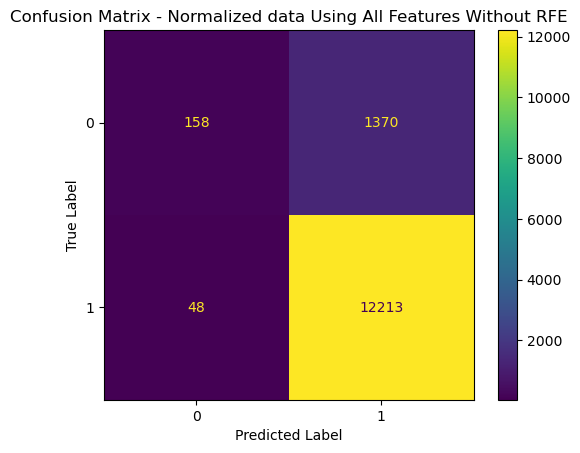

In [76]:
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix - Normalized data Using All Features Without RFE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the  true positive is predicting rightly that a customer will churn. The SVM Model is able to predict 12213 actual churn and 48 wrong prediction of that a customer will churn and did not churn.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.203943 which is very bad model and shows how inaccurate our model predicts a customer will not churn

- The model does much more better if it F1 score is more than 0.7

AUC: 0.7988912403052115


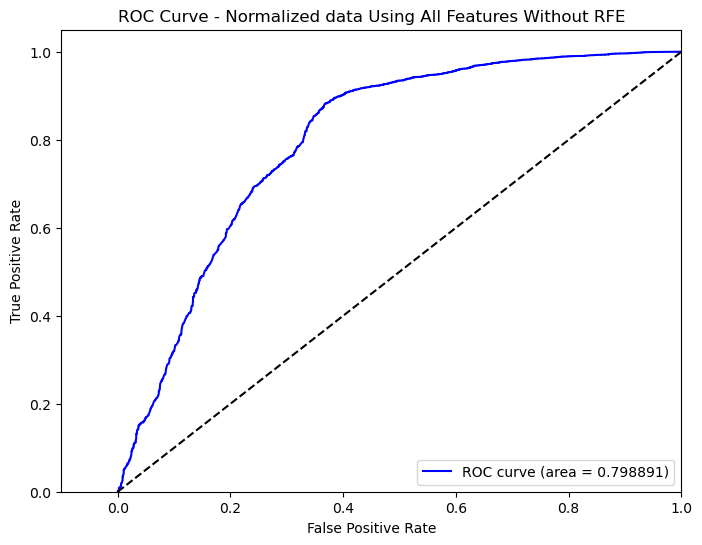

In [77]:
# Compute the probability estimates for positive class
y_prob = svm_model.predict_proba(X_test_normalized)[:, 1]

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC:', auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve - Normalized data Using All Features Without RFE')
plt.show()

### 

### Random Forest Model

In [78]:
%%time

# Train and evaluate Random Forest model on normalized data
random_forest.fit(X_train_normalized, y_train)
y_pred_rf = random_forest.predict(X_test_normalized)

# Compute confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Make predictions on the train set
y_pred_train_rf = random_forest.predict(X_train_normalized)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
print("Random Forest Accuracy on the train set (Normalized Data):", train_accuracy_rf)

# Print accuracy, classification report, and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy (Normalized Data - Test Set):", accuracy_rf)
print("Random Forest Classification Report (Normalized Data):")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix (Normalized Data):")
print(conf_matrix_rf)

Random Forest Accuracy on the train set (Normalized Data): 0.9612176814011676
Random Forest Accuracy (Normalized Data - Test Set): 0.8928131119007905
Random Forest Classification Report (Normalized Data):
              precision    recall  f1-score   support

           0       0.52      0.42      0.47      1528
           1       0.93      0.95      0.94     12261

    accuracy                           0.89     13789
   macro avg       0.72      0.69      0.70     13789
weighted avg       0.88      0.89      0.89     13789

Random Forest Confusion Matrix (Normalized Data):
[[  645   883]
 [  595 11666]]
CPU times: total: 6 s
Wall time: 6.06 s


In [79]:
rf_evaluation1 = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train, y_pred_train_rf), recall_score(y_train,  y_pred_train_rf),  precision_score(y_train,  y_pred_train_rf),
                accuracy_score(y_train,  y_pred_train_rf)]}

df_rf = pd.DataFrame(rf_evaluation1)
 
# Print the output.
print(df_rf)

            metric  rf_value
0         F1 score  0.978617
1     Recall score  0.998307
2  Precision score  0.959688
3   Accuracy score  0.961218


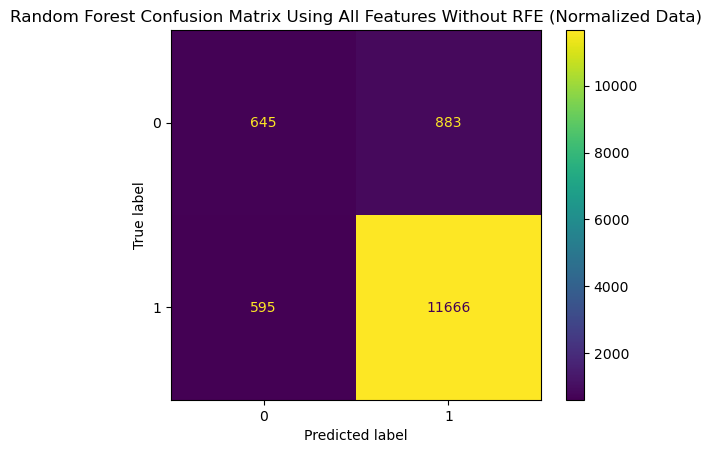

In [80]:
# Plotting the Confusion Matrix for Random Forest Model with Normalized Data
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Random Forest Confusion Matrix Using All Features Without RFE (Normalized Data)")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the  true positive is predicting rightly that a customer will churn. The Random Forest Model is able to predict 11887 actual churn and 374 wrong prediction of that a customer will churn and did not churn.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.791138 which is a very good model and shows how accurate our model predicts a customer churn

- The model does much more better if it F1 score is more than 0.7

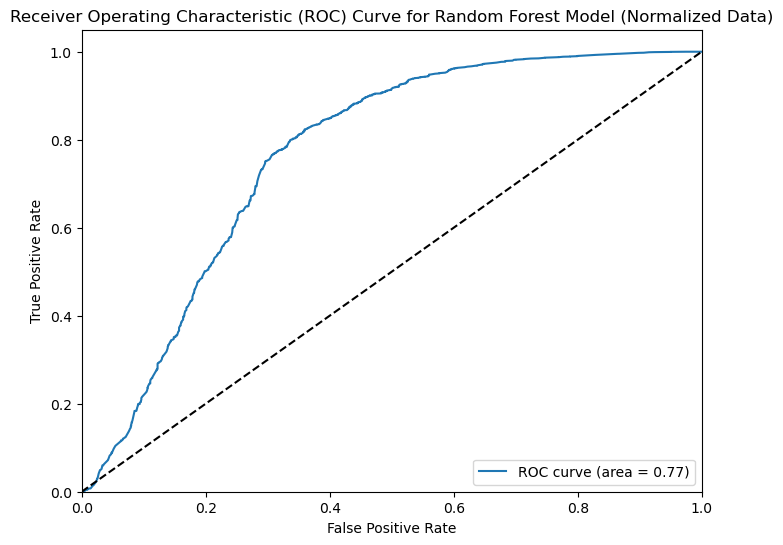

In [81]:
# Plotting the ROC curve for Random Forest Model with Normalized Data
y_prob_rf = random_forest.predict_proba(X_test_normalized)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Model (Normalized Data)')
plt.legend(loc="lower right")
plt.show()

In [82]:
df_inner1 = pd.merge(df_lr, df_svm, on='metric', how='inner')

df_inner1 = pd.merge(df_inner1, df_rf, on='metric', how='inner')

df_inner1

,metric,lr_value,svm_value,rf_value
0,F1 score,0.945235,0.945640,0.978617
1,Recall score,0.995023,0.995778,0.998307
2,Precision score,0.900192,0.900310,0.959688
3,Accuracy score,0.897505,0.898230,0.961218


#### 

## EXPERIMENT 2

### Using SeleckKBest on Top 10 Features

In [83]:
# Initialize SelectKBest with mutual information scoring function
k_best_mutual_info = SelectKBest(score_func=mutual_info_classif, k=10)  # Adjust k as needed

# Fit SelectKBest on your training data and transform both the training and test data
X_train_k_best = k_best_mutual_info.fit_transform(X_train_normalized, y_train)
X_test_k_best = k_best_mutual_info.transform(X_test_normalized)

### 

### Logistics Regression

In [84]:
# Initialize Logistic Regression model

# Fit Logistic Regression model on the top 10 features selected by SelectKBest
logistic_regression.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_lr2 = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr2 = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr2 = accuracy_score(y_train, y_pred_train_lr2)
print("Logistic Regression Accuracy on the train set with top 10 features:", train_accuracy_lr2)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr2))

Logistic Regression Accuracy on the train set with top 10 features: 0.8983029336040904
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.12      0.20      1528
           1       0.90      1.00      0.95     12261

    accuracy                           0.90     13789
   macro avg       0.86      0.56      0.57     13789
weighted avg       0.89      0.90      0.86     13789



In [85]:
lr2_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train, y_pred_train_lr2), recall_score(y_train,  y_pred_train_lr2),  precision_score(y_train,  y_pred_train_lr2),
                accuracy_score(y_train,  y_pred_train_lr2)]}

df_lr2 = pd.DataFrame(lr2_evaluation)
 
# Print the output.
print(df_lr2)

            metric  lr_value
0         F1 score  0.945712
1     Recall score  0.996451
2  Precision score  0.899889
3   Accuracy score  0.898303


<Figure size 640x480 with 0 Axes>

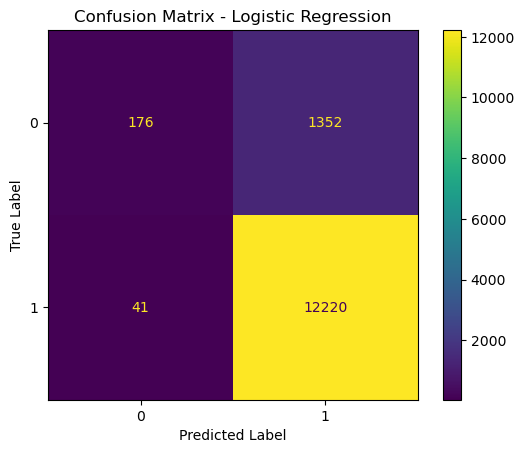

In [86]:
# Calculate the confusion matrix
conf_matrix_lr2 = confusion_matrix(y_test, y_pred_lr2)

# Plot the confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr2, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

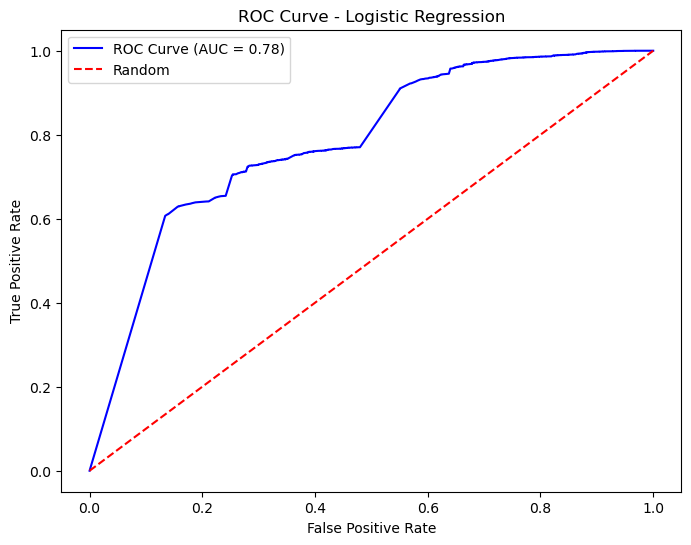

In [87]:
# Plot the ROC AUC curve
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### 

### SVM Model

In [88]:
%%time

# Fit SVM model on the top 10 features selected by SelectKBest
svm_model.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_svm2 = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm2 = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm2 = accuracy_score(y_train, y_pred_train_svm2)
print("SVM Accuracy on the train set with top 10 features:", train_accuracy_svm2)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm2))

SVM Accuracy on the train set with top 10 features: 0.898284802552852
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.12      0.21      1528
           1       0.90      1.00      0.95     12261

    accuracy                           0.90     13789
   macro avg       0.86      0.56      0.58     13789
weighted avg       0.89      0.90      0.86     13789

CPU times: total: 10min 51s
Wall time: 11min 3s


In [89]:
svm2_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train, y_pred_train_svm2), recall_score(y_train,  y_pred_train_svm2),  precision_score(y_train,  y_pred_train_svm2),
                accuracy_score(y_train,  y_pred_train_svm2)]}

df_svm2 = pd.DataFrame(svm2_evaluation)
 
# Print the output.
print(df_svm2)

            metric  svm_value
0         F1 score   0.945749
1     Recall score   0.997349
2  Precision score   0.899226
3   Accuracy score   0.898285


<Figure size 640x480 with 0 Axes>

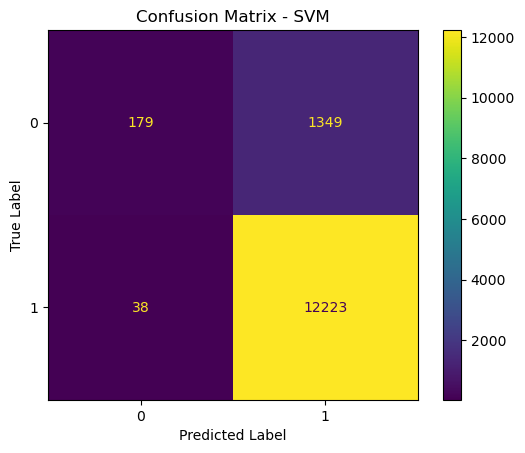

In [90]:
# Calculate the confusion matrix
conf_matrix_svm2 = confusion_matrix(y_test, y_pred_svm2)

# Plot the confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm2, display_labels=svm_model.classes_)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

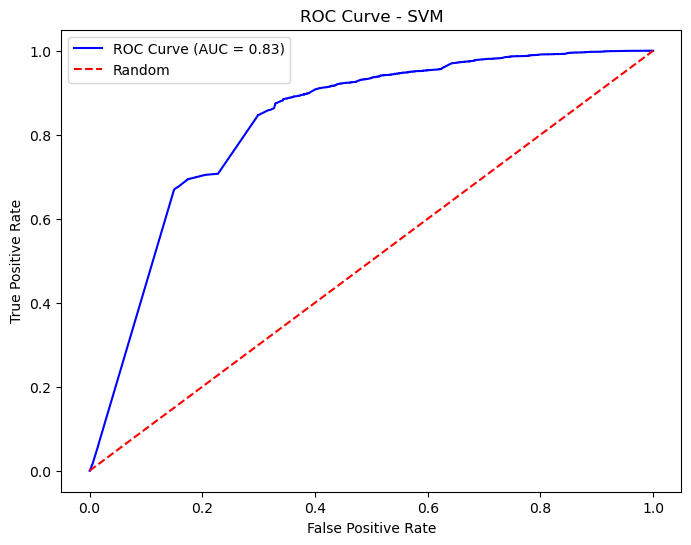

In [91]:
# Calculate decision function scores
y_score_svm = svm_model.decision_function(X_test_k_best)

# Compute fpr, tpr, and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

### 

### Random Forest Model

In [92]:
# Fit Random Forest model on the top 10 features selected by SelectKBest
random_forest.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_rf2 = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf2 = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf2 = accuracy_score(y_train, y_pred_train_rf2)
print("Random Forest Accuracy on the train set with top 10 features:", train_accuracy_rf2)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf2))

Random Forest Accuracy on the train set with top 10 features: 0.9409834282191681
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.42      0.49      1528
           1       0.93      0.96      0.95     12261

    accuracy                           0.90     13789
   macro avg       0.76      0.69      0.72     13789
weighted avg       0.89      0.90      0.90     13789



In [93]:
rf2_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train, y_pred_train_rf2), recall_score(y_train,  y_pred_train_rf2),  precision_score(y_train,  y_pred_train_rf2),
                accuracy_score(y_train,  y_pred_train_rf2)]}

df_rf2 = pd.DataFrame(rf2_evaluation)
 
# Print the output.
print(df_rf2)

            metric  rf_value
0         F1 score  0.967716
1     Recall score  0.995023
2  Precision score  0.941868
3   Accuracy score  0.940983


<Figure size 640x480 with 0 Axes>

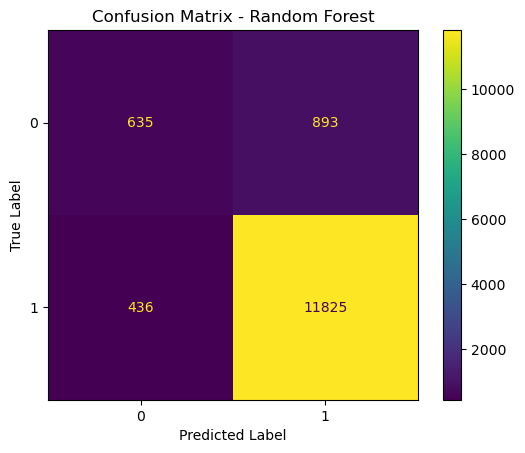

In [94]:
# Calculate the confusion matrix
conf_matrix_rf2 = confusion_matrix(y_test, y_pred_rf2)

# Plot the confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf2, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

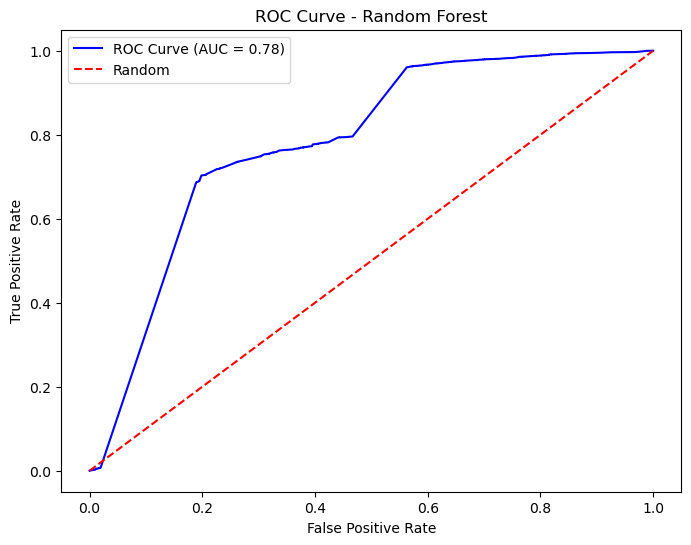

In [95]:
# Plot the ROC AUC curve
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [96]:
df_inner2 = pd.merge(df_lr2, df_svm2, on='metric', how='inner')

df_inner2 = pd.merge(df_inner2, df_rf2, on='metric', how='inner')

df_inner2

,metric,lr_value,svm_value,rf_value
0,F1 score,0.945712,0.945749,0.967716
1,Recall score,0.996451,0.997349,0.995023
2,Precision score,0.899889,0.899226,0.941868
3,Accuracy score,0.898303,0.898285,0.940983


### 

#### 

## EXPERIMENT 3

### PERFORMING SELECTKBEST ON TOP TWENTY (20) FEATURES

#### Logistic Regression, SVM Model and Random Forest Using 20 Top features

In [97]:
# Initialize SelectKBest with mutual information scoring function
k_best_mutual_info = SelectKBest(score_func=mutual_info_classif, k=20)  # Adjust k as needed

# Fit SelectKBest on your training data and transform both the training and test data
X_train_k_best = k_best_mutual_info.fit_transform(X_train_normalized, y_train)
X_test_k_best = k_best_mutual_info.transform(X_test_normalized)

### 

### Logistics Regression Model

In [98]:
# Initialize Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Fit Logistic Regression model on the top 20 features selected by SelectKBest
logistic_regression.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_lr3 = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr3 = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr3 = accuracy_score(y_train, y_pred_train_lr3)
print("Logistic Regression Accuracy on the train set with top 20 features:", train_accuracy_lr3)


# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr3))

Logistic Regression Accuracy on the train set with top 20 features: 0.897505167349603
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.12      0.21      1528
           1       0.90      1.00      0.95     12261

    accuracy                           0.90     13789
   macro avg       0.84      0.56      0.58     13789
weighted avg       0.89      0.90      0.86     13789



In [99]:
lr3_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train, y_pred_train_lr3), recall_score(y_train,  y_pred_train_lr3),  precision_score(y_train,  y_pred_train_lr3),
                accuracy_score(y_train,  y_pred_train_lr3)]}

df_lr3 = pd.DataFrame(lr3_evaluation)
 
# Print the output.
print(df_lr3)

            metric  lr_value
0         F1 score  0.945235
1     Recall score  0.995023
2  Precision score  0.900192
3   Accuracy score  0.897505


<Figure size 640x480 with 0 Axes>

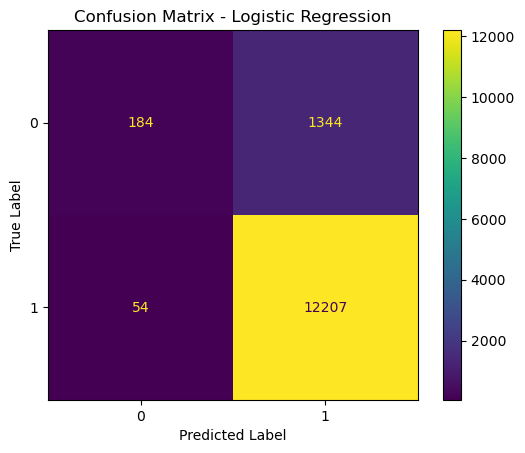

In [100]:
# Calculate the confusion matrix
conf_matrix_lr3 = confusion_matrix(y_test, y_pred_lr3)

# Plot the confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr3, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The Logistic Regression Model is able to predict 12209 actual churn and 52 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.2021 which is very bad and shows how inaccurate our model predicts a customer will not churn
- The model is not good enough in predicting customer churn

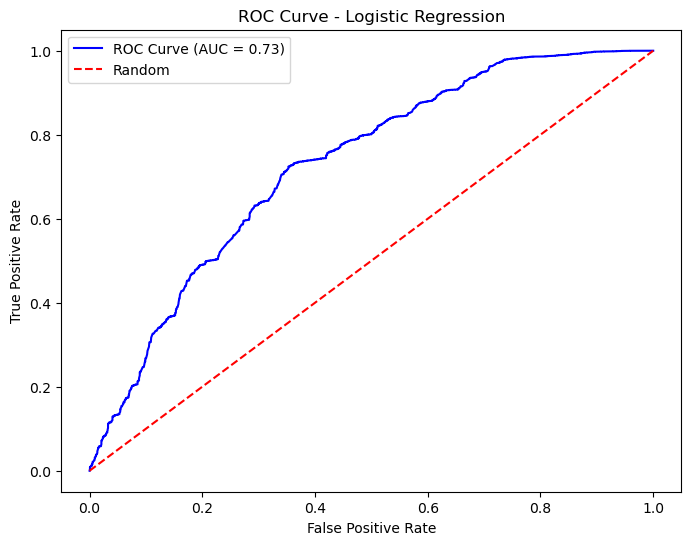

In [101]:
# Plot the ROC AUC curve
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

#### 

### 

### SVM Model

In [102]:
%%time

#Initialize the Model
svm_model = SVC(probability=True)

# Fit SVM model on the top 20 features selected by SelectKBest
svm_model.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_svm3 = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm3 = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm3 = accuracy_score(y_train, y_pred_train_svm3)
print("SVM Accuracy on the train set with top 20 features:", train_accuracy_svm3)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm3))

SVM Accuracy on the train set with top 20 features: 0.898230409399137
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.10      0.18      1528
           1       0.90      1.00      0.95     12261

    accuracy                           0.90     13789
   macro avg       0.83      0.55      0.56     13789
weighted avg       0.88      0.90      0.86     13789

CPU times: total: 11min 37s
Wall time: 11min 51s


In [103]:
svm3_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train, y_pred_train_svm3), recall_score(y_train,  y_pred_train_svm3),  precision_score(y_train,  y_pred_train_svm3),
                accuracy_score(y_train,  y_pred_train_svm3)]}

df_svm3 = pd.DataFrame(svm3_evaluation)
 
# Print the output.
print(df_svm3)

            metric  svm_value
0         F1 score   0.945640
1     Recall score   0.995778
2  Precision score   0.900310
3   Accuracy score   0.898230


<Figure size 640x480 with 0 Axes>

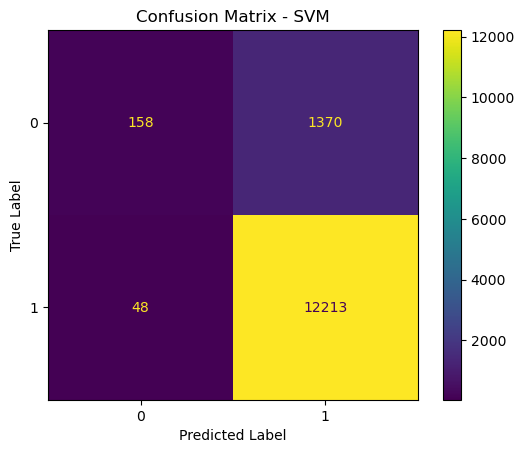

In [104]:
# Calculate the confusion matrix
conf_matrix_svm3 = confusion_matrix(y_test, y_pred_svm3)

# Plot the confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm3, display_labels=svm_model.classes_)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The SVM Model is able to predict 12213 actual churn and 48 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.2039 which is very bad and shows how inaccurate our model predicts customer churn
- The model is not good enough in predicting customer churn

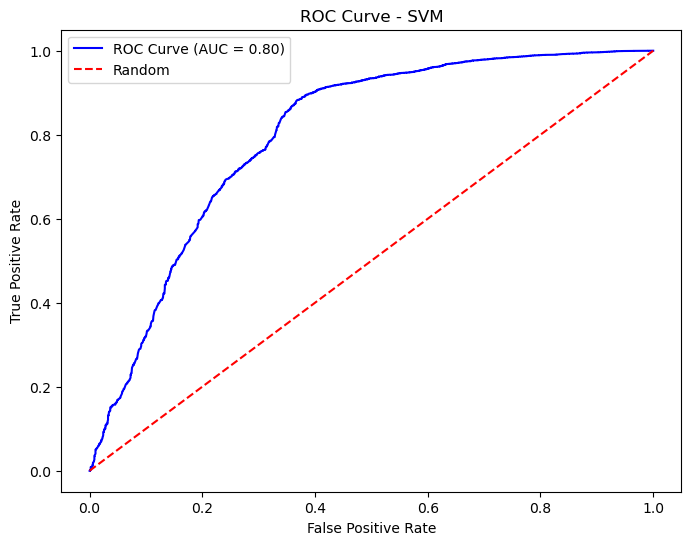

In [105]:
# Get probability estimates
y_prob_svm = svm_model.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class

# Compute fpr, tpr, and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

### 

### 

### Random Forest Model

In [106]:
%%time

#Initialize Models
random_forest = RandomForestClassifier()### Random Forest Model

# Fit Random Forest model on the top 20 features selected by SelectKBest
random_forest.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_rf3 = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf3 = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf3 = accuracy_score(y_train, y_pred_train_rf3)
print("Random Forest Accuracy on the train set with top 20 features:", train_accuracy_rf3)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf3))

Random Forest Accuracy on the train set with top 20 features: 0.9611632882474526
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.42      0.48      1528
           1       0.93      0.96      0.94     12261

    accuracy                           0.90     13789
   macro avg       0.74      0.69      0.71     13789
weighted avg       0.89      0.90      0.89     13789

CPU times: total: 6.11 s
Wall time: 6.17 s


In [107]:
rf3_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train, y_pred_train_rf3), recall_score(y_train,  y_pred_train_rf3),  precision_score(y_train,  y_pred_train_rf3),
                accuracy_score(y_train,  y_pred_train_rf3)]}

df_rf3 = pd.DataFrame(rf3_evaluation)
 
# Print the output.
print(df_rf3)

            metric  rf_value
0         F1 score  0.978590
1     Recall score  0.998450
2  Precision score  0.959505
3   Accuracy score  0.961163


<Figure size 640x480 with 0 Axes>

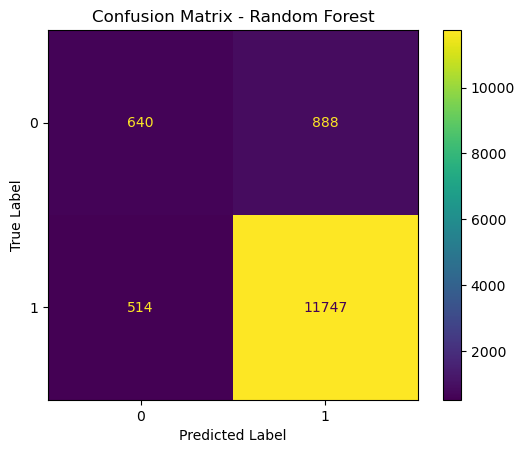

In [108]:
# Calculate the confusion matrix
conf_matrix_rf3 = confusion_matrix(y_test, y_pred_rf3)

# Plot the confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf3, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The Logistic Regression Model is able to predict 11905 actual churn and 356 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.7917 which is very good and shows how accurate our model predicts customer churn
- The model does much more better in predicting a customer churn

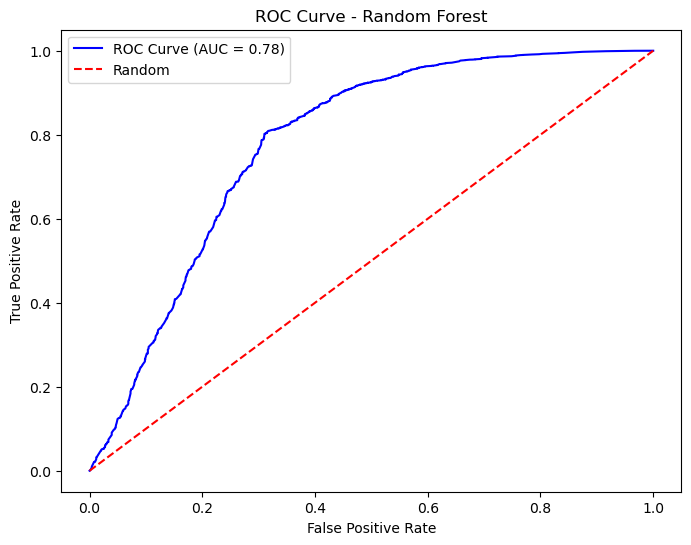

In [109]:
# Plot the ROC AUC curve
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

In [110]:
df_inner3 = pd.merge(df_lr3, df_svm3, on='metric', how='inner')

df_inner3 = pd.merge(df_inner3, df_rf3, on='metric', how='inner')

df_inner3

,metric,lr_value,svm_value,rf_value
0,F1 score,0.945235,0.945640,0.978590
1,Recall score,0.995023,0.995778,0.998450
2,Precision score,0.900192,0.900310,0.959505
3,Accuracy score,0.897505,0.898230,0.961163


### 

## EXPERIMENT 4

### Using SMOTE Technique with SelectKBest On TOP 10 Features
Earlier we discovered that there is a class imbalance in the target variable we will be using the SMOTE technique to address this class imabalance and compare results with other models done.

In [149]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test_normalized, y_test)

# Initialize SelectKBest with mutual information scoring function
k_best = SelectKBest(score_func=mutual_info_classif, k=10)

# Fit SelectKBest on the SMOTE transformed training data
X_train_k_best = k_best.fit_transform(X_train_smote, y_train_smote)
X_test_k_best = k_best.fit_transform(X_test_smote, y_test_smote)

### 

### Logistic Regression Model

In [112]:
logistic_regression = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression model
logistic_regression.fit(X_train_k_best, y_train_smote)
y_pred_lr4 = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr4 = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr4 = accuracy_score(y_train_smote, y_pred_train_lr4)
print("Logistic Regression Accuracy on the train set with SMOTE data and top features:", train_accuracy_lr4)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr4))

Logistic Regression Accuracy on the train set with SMOTE data and top features: 0.6378877807012177
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46      1528
           1       0.93      0.95      0.94     12261

    accuracy                           0.89     13789
   macro avg       0.71      0.69      0.70     13789
weighted avg       0.88      0.89      0.88     13789



In [113]:
lr4_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train_smote, y_pred_train_lr4), recall_score(y_train_smote,  y_pred_train_lr4),  precision_score(y_train_smote,  y_pred_train_lr4),
                accuracy_score(y_train_smote,  y_pred_train_lr4)]}

df_lr4 = pd.DataFrame(lr4_evaluation)
 
# Print the output.
print(df_lr4)

            metric  lr_value
0         F1 score  0.728553
1     Recall score  0.971894
2  Precision score  0.582666
3   Accuracy score  0.637888


<Figure size 640x480 with 0 Axes>

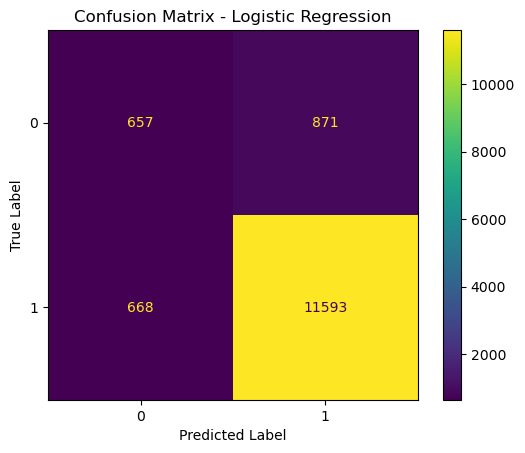

In [114]:
# Calculate confusion matrix
conf_matrix_lr4 = confusion_matrix(y_test, y_pred_lr4)

# Plot confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr4, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The Logistic Regression Model is able to predict 11903 actual churn and 358 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.4562 which is  not so fair and shows how well our model predicts customer churn
- The model performs fairly in predicting a customer churn

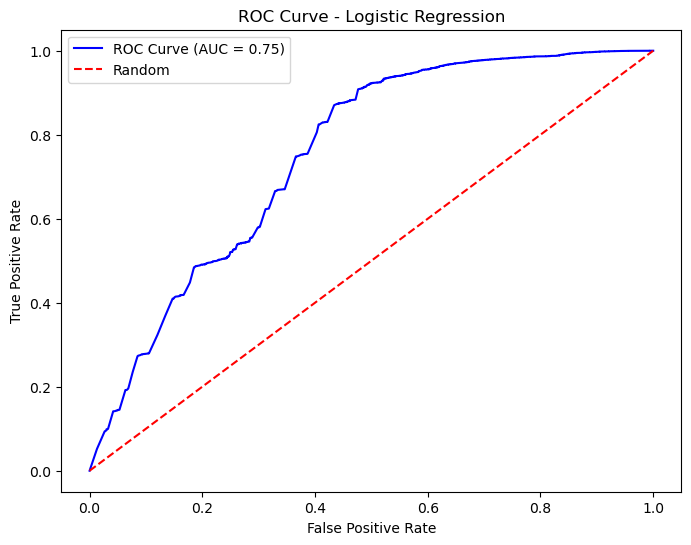

In [115]:
# Calculate ROC AUC
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

### 

### Random Forest Model

In [116]:
%%time

random_forest = RandomForestClassifier()

# Train and evaluate Random Forest model
random_forest.fit(X_train_k_best, y_train_smote)
y_pred_rf4 = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf4 = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf4 = accuracy_score(y_train_smote, y_pred_train_rf4)
print("Random Forest Accuracy on the train set with SMOTE data and top features:", train_accuracy_rf4)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf4))

Random Forest Accuracy on the train set with SMOTE data and top features: 0.8895347651389993
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.77      0.36      1528
           1       0.96      0.69      0.80     12261

    accuracy                           0.70     13789
   macro avg       0.60      0.73      0.58     13789
weighted avg       0.88      0.70      0.75     13789

CPU times: total: 12.2 s
Wall time: 12.3 s


In [117]:
rf4_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train_smote, y_pred_train_rf4), recall_score(y_train_smote,  y_pred_train_rf4),  precision_score(y_train_smote,  y_pred_train_rf4),
                accuracy_score(y_train_smote,  y_pred_train_rf4)]}

df_rf4 = pd.DataFrame(rf4_evaluation)
 
# Print the output.
print(df_rf4)

            metric  rf_value
0         F1 score  0.899887
1     Recall score  0.992943
2  Precision score  0.822779
3   Accuracy score  0.889535


<Figure size 640x480 with 0 Axes>

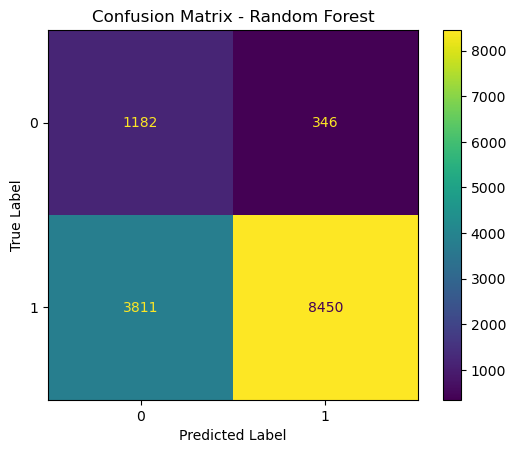

In [118]:
# Calculate confusion matrix
conf_matrix_rf4 = confusion_matrix(y_test, y_pred_rf4)

# Plot confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf4, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The Random Forest Model is able to predict 11777 actual churn and 484 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.8767 which is very good and shows how accurate our model predicts customer churn
- The model does much more better in predicting a customer churn

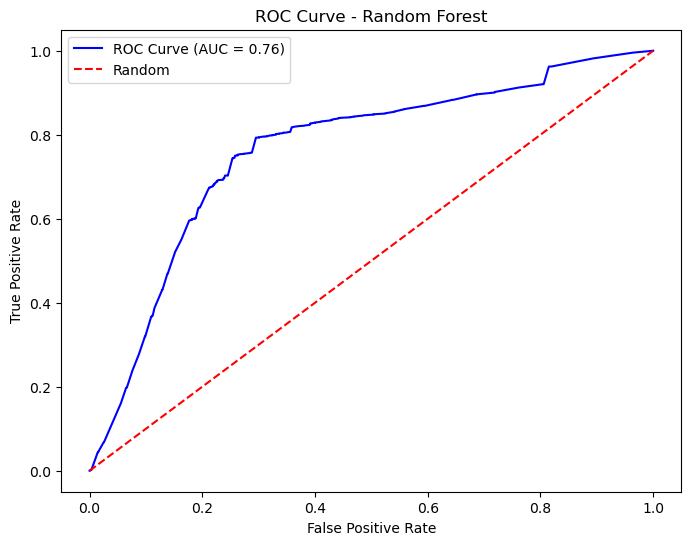

In [119]:
# Calculate ROC AUC
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

#### 

### SVM Model

In [120]:
svm_model = SVC()

# Train and evaluate SVM model
svm_model.fit(X_train_k_best, y_train_smote)
y_pred_svm4 = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm4 = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm4 = accuracy_score(y_train_smote, y_pred_train_svm4)
print("SVM Accuracy on the train set with SMOTE data and top features:", train_accuracy_svm4)


print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm4))

SVM Accuracy on the train set with SMOTE data and top features: 0.5943421240490322
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.26      0.37      1528
           1       0.91      0.98      0.95     12261

    accuracy                           0.90     13789
   macro avg       0.78      0.62      0.66     13789
weighted avg       0.88      0.90      0.88     13789



In [121]:
svm4_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train_smote, y_pred_train_svm4), recall_score(y_train_smote,  y_pred_train_svm4),  precision_score(y_train_smote,  y_pred_train_svm4),
                accuracy_score(y_train_smote,  y_pred_train_svm4)]}

df_svm4 = pd.DataFrame(svm4_evaluation)
 
# Print the output.
print(df_svm4)

            metric  svm_value
0         F1 score   0.708381
1     Recall score   0.985396
2  Precision score   0.552938
3   Accuracy score   0.594342


<Figure size 640x480 with 0 Axes>

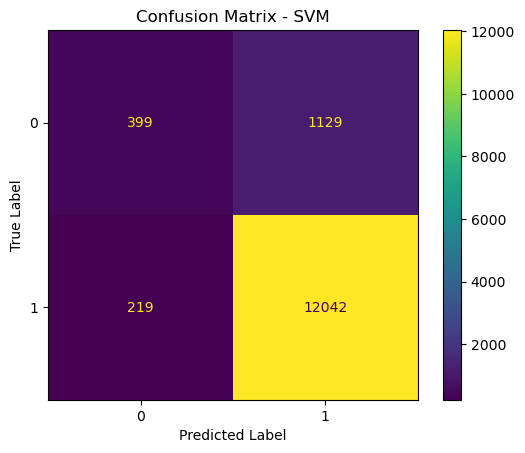

In [122]:
# Calculate confusion matrix
conf_matrix_svm4 = confusion_matrix(y_test, y_pred_svm4)

# Plot confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm4)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The SVM Model is able to predict 12093 actual churn and 168 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.3338 which is very bad and shows how inaccurate our model predicts customer churn
- The model is not good enough in predicting customer churn 

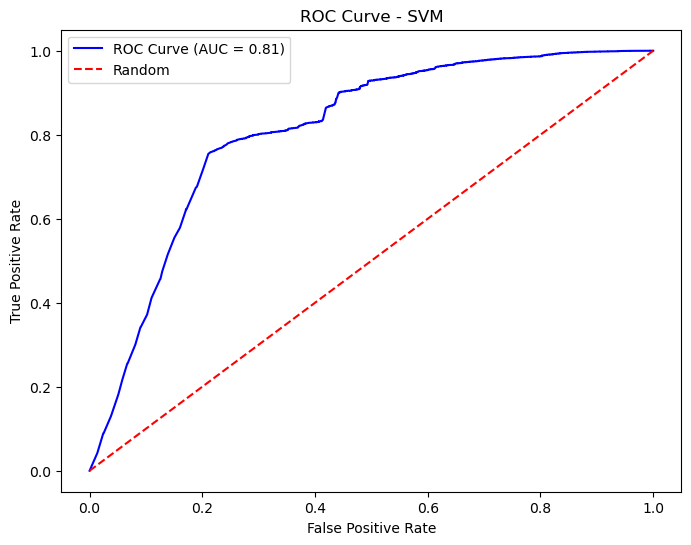

In [123]:
# Calculate ROC AUC
# Note: SVM does not have predict_proba method, so we'll use decision_function instead
y_score_svm = svm_model.decision_function(X_test_k_best)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

In [124]:
df_inner4 = pd.merge(df_lr4, df_svm4, on='metric', how='inner')

df_inner4 = pd.merge(df_inner4, df_rf4, on='metric', how='inner')

df_inner4

,metric,lr_value,svm_value,rf_value
0,F1 score,0.728553,0.708381,0.899887
1,Recall score,0.971894,0.985396,0.992943
2,Precision score,0.582666,0.552938,0.822779
3,Accuracy score,0.637888,0.594342,0.889535


### Note: The Smote model will have a better result than the non smote model because imbalance will be corrected by reducing the overbalanced category to improve the model

#### 

### 

### 

## EXPERIMENT 5

### Using SMOTE Technique On SelectKBest TOP 20 Features

In [125]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)

# Initialize SelectKBest with mutual information scoring function
k_best = SelectKBest(score_func=mutual_info_classif, k=20)

# Fit SelectKBest on the SMOTE transformed training data
X_train_k_best = k_best.fit_transform(X_train_smote, y_train_smote)
X_test_k_best = k_best.transform(X_test_normalized)

### Logistic Regression Model

In [126]:
logistic_regression = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression model
logistic_regression.fit(X_train_k_best, y_train_smote)
y_pred_lr5 = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr5 = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr5 = accuracy_score(y_train_smote, y_pred_train_lr5)
print("Logistic Regression Accuracy on the train set with SMOTE data and top features:", train_accuracy_lr5)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr5))

Logistic Regression Accuracy on the train set with SMOTE data and top features: 0.6569275326847376
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.58      0.35      1528
           1       0.94      0.78      0.85     12261

    accuracy                           0.76     13789
   macro avg       0.59      0.68      0.60     13789
weighted avg       0.86      0.76      0.80     13789



In [127]:
lr5_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train_smote, y_pred_train_lr5), recall_score(y_train_smote,  y_pred_train_lr5),  precision_score(y_train_smote,  y_pred_train_lr5),
                accuracy_score(y_train_smote,  y_pred_train_lr5)]}

df_lr5 = pd.DataFrame(lr5_evaluation)
 
# Print the output.
print(df_lr5)

            metric  lr_value
0         F1 score  0.697263
1     Recall score  0.790165
2  Precision score  0.623909
3   Accuracy score  0.656928


<Figure size 640x480 with 0 Axes>

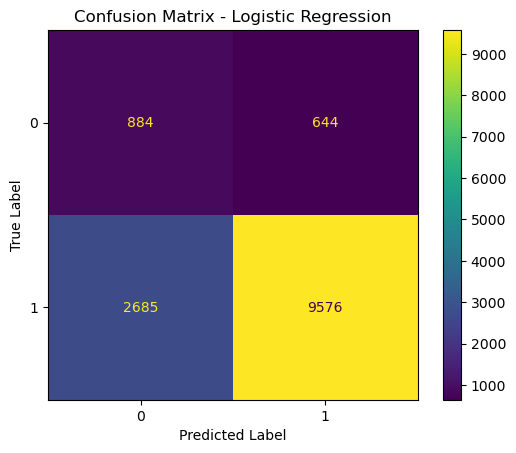

In [128]:
# Calculate confusion matrix
conf_matrix_lr5 = confusion_matrix(y_test, y_pred_lr5)

# Plot confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr5, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The Logistic Regression Model is able to predict 9646 actual churn and 2615 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.60 which is fair enough and shows how accurate our model predicts a customer will not churn
- The model does much more better in predicting a customer churn

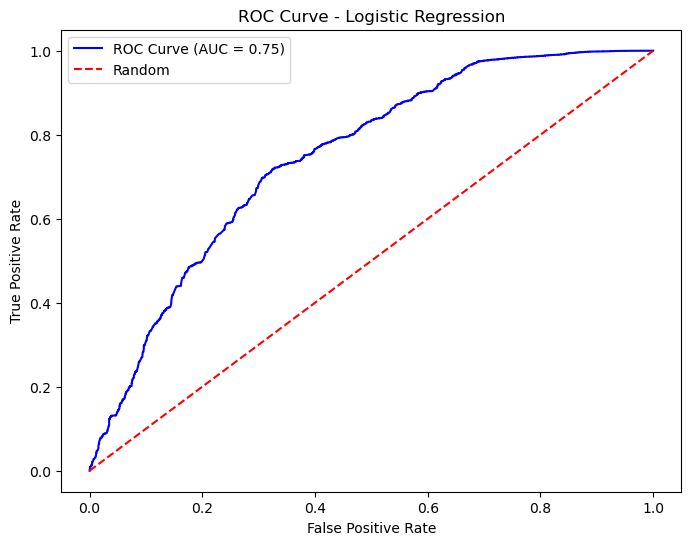

In [129]:
# Calculate ROC AUC
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

### 

### Random Forest Model

In [130]:
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [131]:
cv_params = {'max_depth': [4,5,6,7,8],
            'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75,100,125]
            }

random_forest = RandomForestClassifier()

scoring = {'accuracy', 'precision', 'recall', 'f1'}

random_forest_cv = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=5, refit='f1')

In [132]:
%%time

# Train and evaluate Random Forest Model
random_forest.fit(X_train_k_best, y_train_smote)
y_pred_rf5 = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf5 = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf5 = accuracy_score(y_train_smote, y_pred_train_rf5)
print("Random Forest Accuracy on the train set with SMOTE data and top features:", train_accuracy_rf5)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf5))

Random Forest Accuracy on the train set with SMOTE data and top features: 0.9024760855820025
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.73      0.41      1528
           1       0.96      0.77      0.85     12261

    accuracy                           0.77     13789
   macro avg       0.62      0.75      0.63     13789
weighted avg       0.88      0.77      0.80     13789

CPU times: total: 16 s
Wall time: 16.2 s


In [133]:
rf5_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train_smote, y_pred_train_rf5), recall_score(y_train_smote,  y_pred_train_rf5),  precision_score(y_train_smote,  y_pred_train_rf5),
                accuracy_score(y_train_smote,  y_pred_train_rf5)]}

df_rf5 = pd.DataFrame(rf5_evaluation)
 
# Print the output.
print(df_rf5)

            metric  rf_value
0         F1 score  0.909658
1     Recall score  0.981970
2  Precision score  0.847265
3   Accuracy score  0.902476


# This is the model that has the best F1 score, therefore it is the best model

- Note: The data was first balanced before it was model by the best 10 features of the dataset

<Figure size 640x480 with 0 Axes>

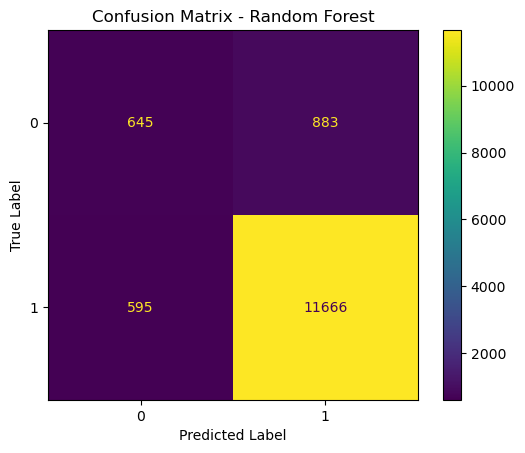

In [134]:
# Calculate confusion matrix
conf_matrix_rf5 = confusion_matrix(y_test, y_pred_rf5)

# Plot confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The random forest is able to predict 11887 actual churn and 374 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.8938 which is very good and shows how accurate our model predicts customer churn

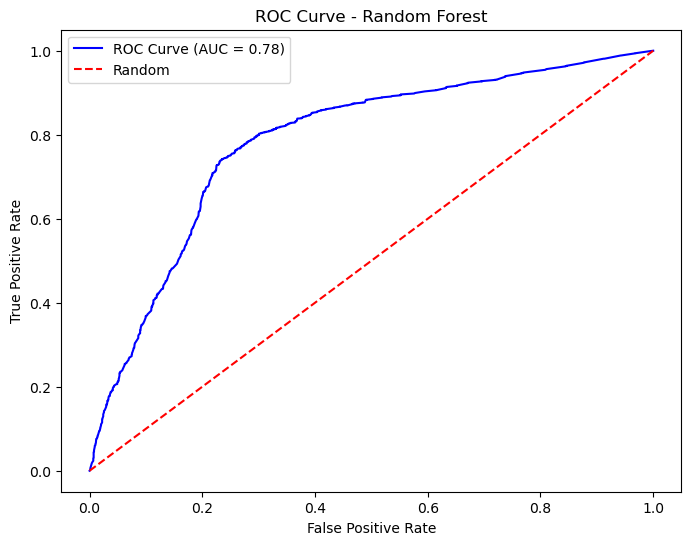

In [135]:
# Calculate ROC AUC
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

### 

### 

### SVM Model

In [136]:
%%time

svm_model = SVC()

# Train and evaluate svm model
svm_model.fit(X_train_k_best, y_train_smote)
y_pred_svm5 = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm5 = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm5 = accuracy_score(y_train_smote, y_pred_train_svm5)
print("SVM Accuracy on the train set with SMOTE data and top features:", train_accuracy_svm5)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm5))

SVM Accuracy on the train set with SMOTE data and top features: 0.6414468987741949
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.54      0.30      1528
           1       0.93      0.75      0.83     12261

    accuracy                           0.72     13789
   macro avg       0.57      0.64      0.56     13789
weighted avg       0.85      0.72      0.77     13789

CPU times: total: 45min 50s
Wall time: 46min 46s


In [137]:
svm5_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train_smote, y_pred_train_svm5), recall_score(y_train_smote,  y_pred_train_svm5),  precision_score(y_train_smote,  y_pred_train_svm5),
                accuracy_score(y_train_smote,  y_pred_train_svm5)]}

df_svm5 = pd.DataFrame(svm5_evaluation)
 
# Print the output.
print(df_svm5)

            metric  svm_value
0         F1 score   0.675502
1     Recall score   0.746395
2  Precision score   0.616908
3   Accuracy score   0.641447


<Figure size 640x480 with 0 Axes>

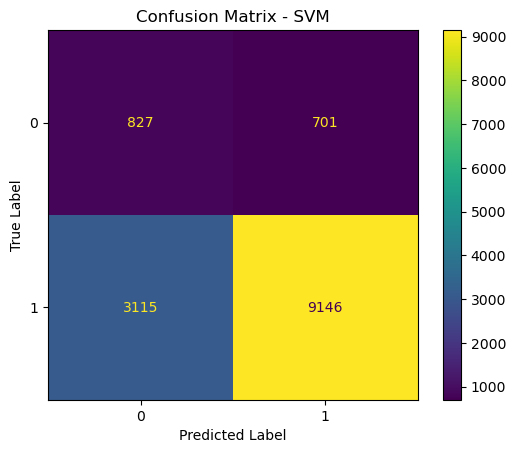

In [138]:
# Calculate confusion matrix
conf_matrix_svm5 = confusion_matrix(y_test, y_pred_svm5)

# Plot confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm5)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the  true positive is predicting rightly that a customer will churn. The SVM Model is able to predict 9150 actual churn and 3111 wrong prediction of that a customer will churn and did not churn.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.5994 which is a very good model and shows how accurate our model predicts a customer churn

- The model does much more better if it F1 score is more than 0.7

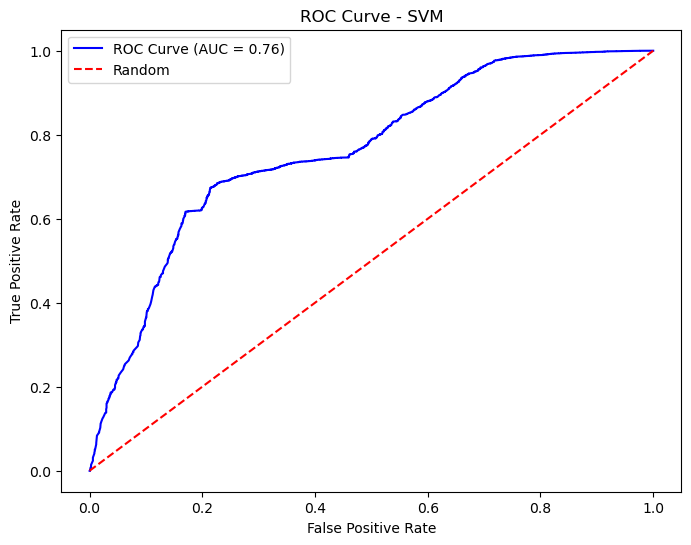

In [139]:
# Calculate ROC AUC
# Note: SVM does not have predict_proba method, so we'll use decision_function instead
y_score_svm = svm_model.decision_function(X_test_k_best)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

#### 

- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

## Model Evaluation

In [140]:
df_inner = pd.merge(df_lr5, df_svm5, on='metric', how='inner')

df_inner = pd.merge(df_inner, df_rf5, on='metric', how='inner')

df_inner

,metric,lr_value,svm_value,rf_value
0,F1 score,0.697263,0.675502,0.909658
1,Recall score,0.790165,0.746395,0.981970
2,Precision score,0.623909,0.616908,0.847265
3,Accuracy score,0.656928,0.641447,0.902476


## The most accurate model base on their F1 score is the random forest model
- The Logistic regression is the most inaccurate mosel withlesser AUC than the others
- THe SVM model has a better performance than the logistic regression but it is very slow to execute some models took more than 30 mins to execute
- The random forest model takes lesser time to run and has abetter output when predicting the number of customers that churn and those that a likely to retain

## Model Deployment

- We will deploy the best model on the test dataset

In [155]:
# Train and evaluate Random Forest Model
random_forest.fit(X_test, y_test)
y_pred_rf5_de = random_forest.predict(X_train)

# Make predictions on the test set
y_pred_test_rf5_de = random_forest.predict(X_test)
y_pred_rf5_de = random_forest.predict(X_test)
rf_deployment = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_de_value': [f1_score(y_test, y_pred_test_rf5_de), recall_score(y_test,  y_pred_test_rf5_de),  precision_score(y_test,  y_pred_test_rf5_de),
                accuracy_score(y_test,  y_pred_test_rf5_de)]}

df_rf_deployment = pd.DataFrame(rf_deployment)
 
# Print the output.
print(df_rf_deployment)


            metric  rf_de_value
0         F1 score     0.983488
1     Recall score     0.998287
2  Precision score     0.969121
3   Accuracy score     0.970194


In [150]:
# Train and evaluate Random Forest Model
random_forest.fit(X_test_k_best, y_test_smote)
y_pred_rf5_de = random_forest.predict(X_train_k_best)


# Make predictions on the test set
y_pred_test_rf5_de = random_forest.predict(X_test_k_best)


In [151]:
y_pred_rf5_de = random_forest.predict(X_test_k_best)

In [152]:
rf_deployment = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_de_value': [f1_score(y_test_smote, y_pred_test_rf5_de), recall_score(y_test_smote,  y_pred_test_rf5_de),  precision_score(y_test_smote,  y_pred_test_rf5_de),
                accuracy_score(y_test_smote,  y_pred_test_rf5_de)]}

df_rf_deployment = pd.DataFrame(rf_deployment)
 
# Print the output.
print(df_rf_deployment)

            metric  rf_de_value
0         F1 score     0.943945
1     Recall score     0.994372
2  Precision score     0.898386
3   Accuracy score     0.940951


## The model was deployed against the test data and it performed though less that the train model but a very good performance of 0.846010 F1 score